In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch 
from sklearn import preprocessing
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA

school - Escuela(Binario: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)<br>
sex - Sexo (Binario: 'F' - Femenino  o 'M' - Masculino)<br>
age - Edad del estudiante (Numerico: desde 15 a 22)<br>
address - Tipo de urbanizacion (student's home address type )(Binario: 'U' - uroban o 'R' - rural)<br>
famsize - Tamaño de familia (Binario: 'LE3' - Menor o igual a 3 or 'GT3' - Mayor a  3)<br>
Pstatus - Estado de convivencia de los padres(Binario: 'T' - Vivir Juntos o 'A' - Aparte)<br>
Medu -Educacion de la Madre (Numerico: 0 - Nada, 1 - Educacion primaria (4th grado), 2 – 5th to 9th grado, 3 – Educacion Secudnaria or 4 – Educacion mas alta)<br>
Fedu - father's education (Numerico: 0 - Nada, 1 - Educacion primaria(4th grado), 2 – 5th to 9th grado, 3 – Educacion Secudnaria or 4 – Educacion mas alta)<br>
Mjob - Trabajo de la madre (Categorico: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
Fjob - Trabajo del padre(Categorico: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
reason - Razon para elegir esta escuela (Categorico: close to 'home', school 'reputation', 'course' preference or 'other')<br>
guardian - Tutor del estudiante(Categorico: 'mother', 'father' or 'other')<br>
traveltime -Tiempo de distancia a la escuela (Numerico: 1 - 1 hora)<br>
studytime - Tiempo de estudio entre semana (Numerico: 1 - 10 horas)<br>
failures - number of past class failures (Numerico: n if 1<=n<3, else 4)<br>
schoolsup - extra educational support (Binario: yes or no)<br>
famsup - family educational support (Binario: yes or no)<br>
paid - extra paid classes within the course subject (Math or Portuguese) <br>(Binario: yes or no)
activities - extra-curricular activities (Binario: yes or no)<br>
nursery - attended nursery school (Binario: yes or no)<br>
higher - wants to take higher education (Binario: yes or no)<br>
internet - Internet access at home (Binario: yes or no)<br>
romantic - with a romantic relationship (Binario: yes or no)<br>
famrel - quality of family relationships (Numerico: from 1 - very bad to 5 - excellent)<br>
freetime - free time after school (Numerico: from 1 - very low to 5 - very high)<br>
goout - going out with friends (Numerico: from 1 - very low to 5 - very high)<br>
Dalc - workday alcohol consumption (Numerico: from 1 - very low to 5 - very high)<br>
Walc - weekend alcohol consumption (Numerico: from 1 - very low to 5 - very high)<br>
health - current health status (Numerico: from 1 - very bad to 5 - very good)<br>
absences - number of school absences (Numerico: from 0 to 93)<br>
These grades are related with the course subject, Math or Portuguese:<br>

G1 - first period grade (Numerico: from 0 to 20)<br>
G2 - second period grade (Numerico: from 0 to 20)<br>
G3 - final grade (Numerico: from 0 to 20, output target)<br>

In [2]:
Mat_dataset = pd.read_csv("Datasets/student-mat.csv")
Mat_dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
Por_dataset = pd.read_csv("Datasets/student-por.csv")
Por_dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


# EDA

## ¿ Que influye en las calificaciones?

### Edad

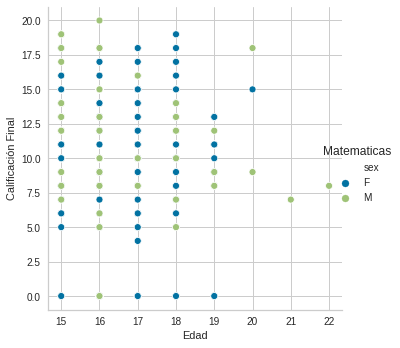

In [132]:
g1=sns.relplot(x="age", y="G3",hue="sex", data=Mat_dataset)
g1._legend.set_title("Matematicas")
g1.set(xlabel="Edad", ylabel = "Calificación Final")


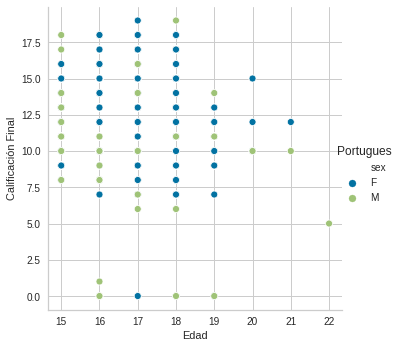

In [133]:
g2=sns.relplot(x="age", y="G3",hue="sex", data=Por_dataset)
g2._legend.set_title("Portugues")
g2.set(xlabel="Edad", ylabel = "Calificación Final")

### Educacion de la madre

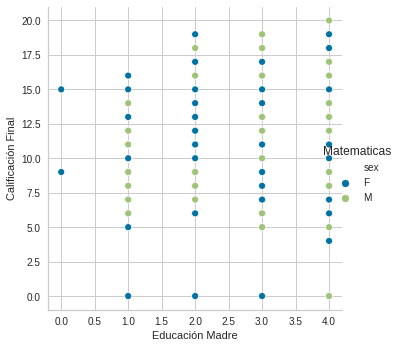

In [134]:
g3=sns.relplot(x="Medu", y="G3",hue="sex", data=Mat_dataset)
g3._legend.set_title("Matematicas")
g3.set(xlabel="Educación Madre", ylabel = "Calificación Final")


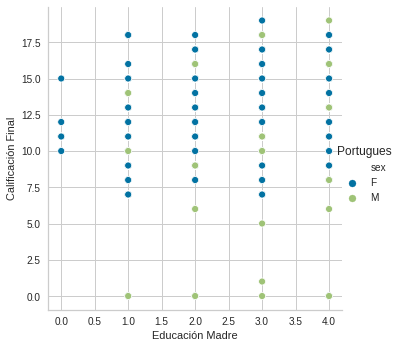

In [135]:
g4=sns.relplot(x="Medu", y="G3",hue="sex", data=Por_dataset);
g4._legend.set_title("Portugues")
g4.set(xlabel="Educación Madre", ylabel = "Calificación Final")

### Educacion del padre

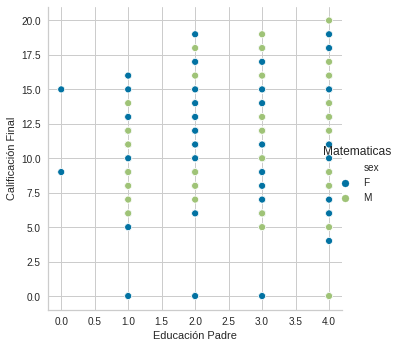

In [136]:
g5=sns.relplot(x="Medu", y="G3",hue="sex", data=Mat_dataset);
g5._legend.set_title("Matematicas")
g5.set(xlabel="Educación Padre", ylabel = "Calificación Final")

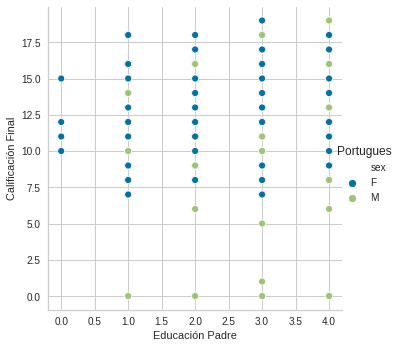

In [137]:
g6=sns.relplot(x="Medu", y="G3",hue="sex", data=Por_dataset);
g6._legend.set_title("Portugues")
g6.set(xlabel="Educación Padre", ylabel = "Calificación Final")

## En portugueiro se ve que influye la educacion de sus padres

## Relacion amorosa

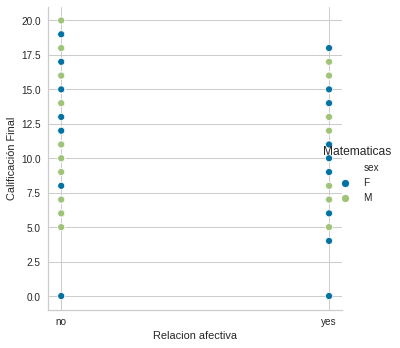

In [138]:
g7=sns.relplot(x="romantic", y="G3",hue="sex", data=Mat_dataset)
g7._legend.set_title("Matematicas")
g7.set(xlabel="Relacion afectiva", ylabel = "Calificación Final")

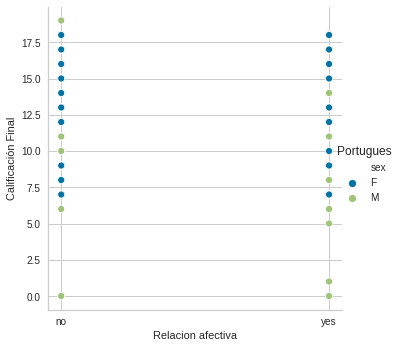

In [139]:
g8=sns.relplot(x="romantic", y="G3",hue="sex", data=Por_dataset)
g8._legend.set_title("Portugues")
g8.set(xlabel="Relacion afectiva", ylabel = "Calificación Final")

## Internet

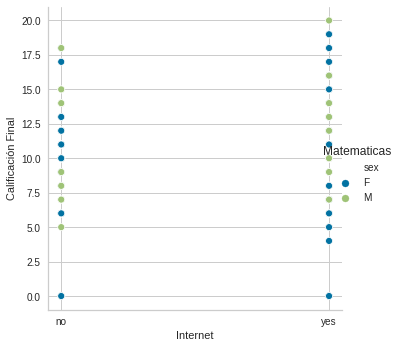

In [140]:
g9=sns.relplot(x="internet", y="G3",hue="sex", data=Mat_dataset)
g9._legend.set_title("Matematicas")
g9.set(xlabel="Internet", ylabel = "Calificación Final")

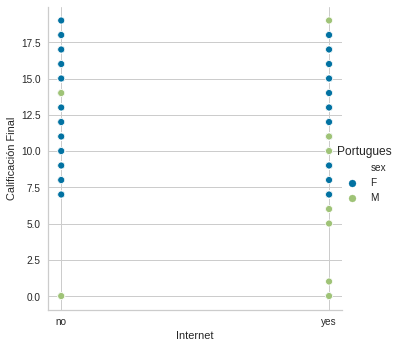

In [141]:
g10=sns.relplot(x="internet", y="G3",hue="sex", data=Por_dataset)
g10._legend.set_title("Portugues")
g10.set(xlabel="Internet", ylabel = "Calificación Final")

# Tamaño de la familia

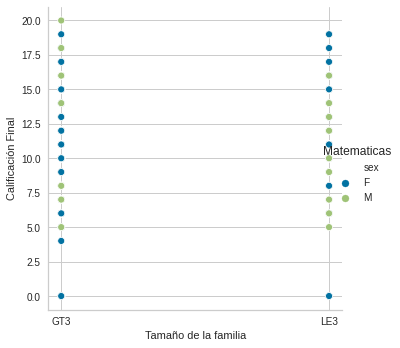

In [142]:
g11=sns.relplot(x="famsize", y="G3",hue="sex", data=Mat_dataset)
g11._legend.set_title("Matematicas")
g11.set(xlabel="Tamaño de la familia", ylabel = "Calificación Final")

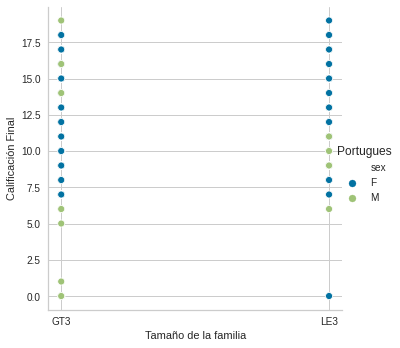

In [143]:
g11=sns.relplot(x="famsize", y="G3",hue="sex", data=Por_dataset)
g11._legend.set_title("Portugues")
g11.set(xlabel="Tamaño de la familia", ylabel = "Calificación Final")

## Relacion con la familia

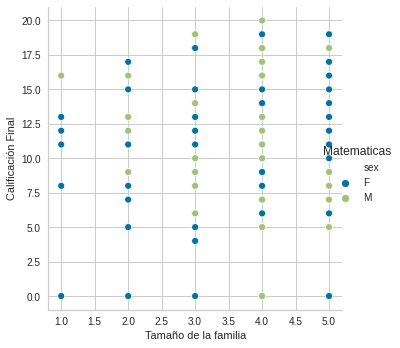

In [146]:
g12=sns.relplot(x="famrel", y="G3",hue="sex", data=Mat_dataset)
g12._legend.set_title("Matematicas")
g12.set(xlabel="Tamaño de la familia", ylabel = "Calificación Final")

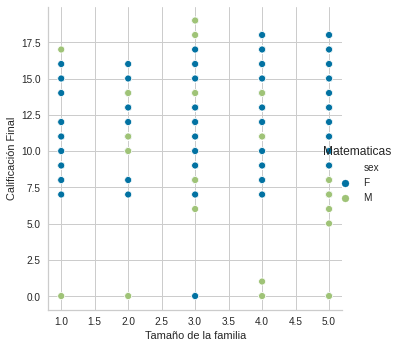

In [147]:
g13=sns.relplot(x="famrel", y="G3",hue="sex", data=Por_dataset)
g13._legend.set_title("Matematicas")
g13.set(xlabel="Tamaño de la familia", ylabel = "Calificación Final")

## Salir Fuera

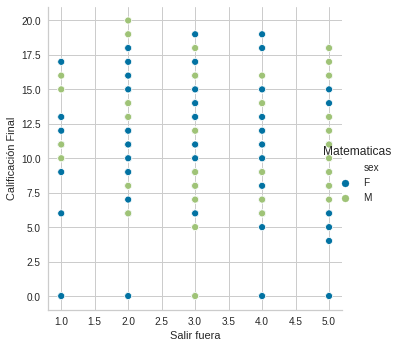

In [148]:
g14=sns.relplot(x="goout", y="G3",hue="sex", data=Mat_dataset)
g14._legend.set_title("Matematicas")
g14.set(xlabel="Salir fuera", ylabel = "Calificación Final")

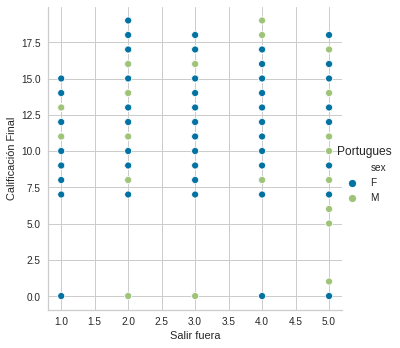

In [149]:
g15=sns.relplot(x="goout", y="G3",hue="sex", data=Por_dataset)
g15._legend.set_title("Portugues")
g15.set(xlabel="Salir fuera", ylabel = "Calificación Final")

## Consumo diario de alcohol

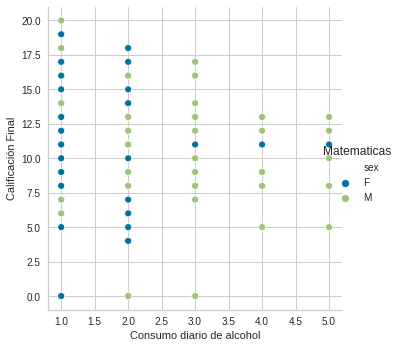

In [152]:
g17=sns.relplot(x="Dalc", y="G3",hue="sex", data=Mat_dataset)
g17._legend.set_title("Matematicas")
g17.set(xlabel="Consumo diario de alcohol", ylabel = "Calificación Final")


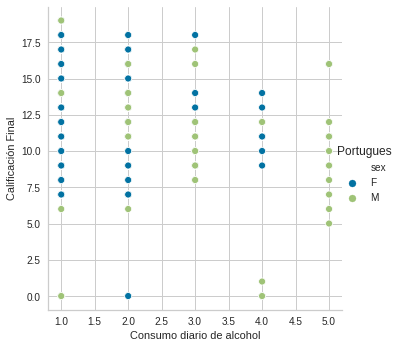

In [153]:
g18=sns.relplot(x="Dalc", y="G3",hue="sex", data=Por_dataset)
g18._legend.set_title("Portugues")
g18.set(xlabel="Consumo diario de alcohol", ylabel = "Calificación Final")


## Consumo semanal de alcohol

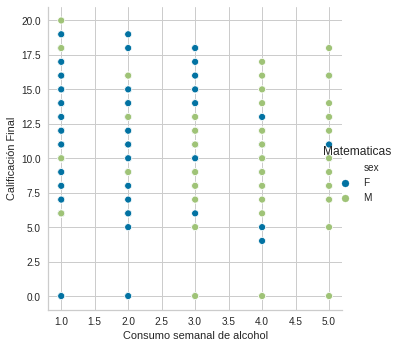

In [155]:
g19=sns.relplot(x="Walc", y="G3",hue="sex", data=Mat_dataset)
g19._legend.set_title("Matematicas")
g19.set(xlabel="Consumo semanal de alcohol", ylabel = "Calificación Final")


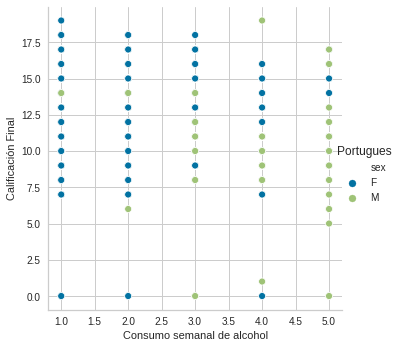

In [156]:
g20=sns.relplot(x="Walc", y="G3",hue="sex", data=Por_dataset)
g20._legend.set_title("Portugues")
g20.set(xlabel="Consumo semanal de alcohol", ylabel = "Calificación Final")


## hay un impacto grande en las calificaciones para los que consumen diario

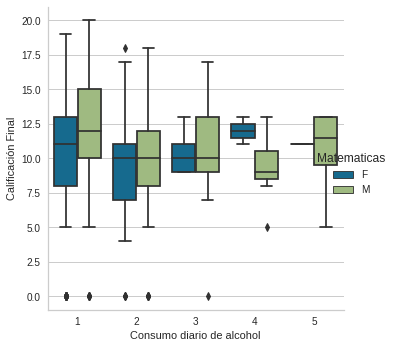

In [163]:
g21=sns.catplot(x="Dalc", y="G3", hue="sex", data=Mat_dataset,kind="box")
g21._legend.set_title("Matematicas")
g21.set(xlabel="Consumo diario de alcohol", ylabel = "Calificación Final")

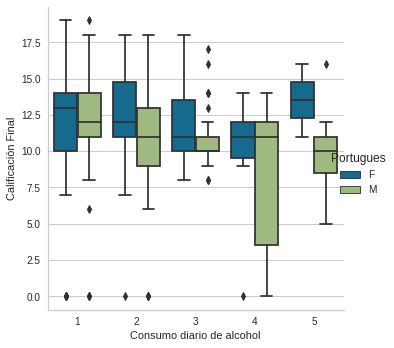

In [164]:
g23=sns.catplot(x="Dalc", y="G3", hue="sex", data=Por_dataset,kind="box")
g23._legend.set_title("Portugues")
g23.set(xlabel="Consumo diario de alcohol", ylabel = "Calificación Final")

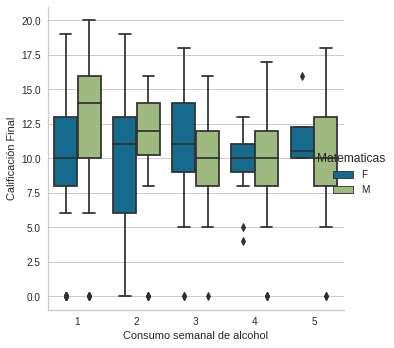

In [165]:
g24=sns.catplot(x="Walc", y="G3", hue="sex", data=Mat_dataset,kind="box")
g24._legend.set_title("Matematicas")
g24.set(xlabel="Consumo semanal de alcohol", ylabel = "Calificación Final")

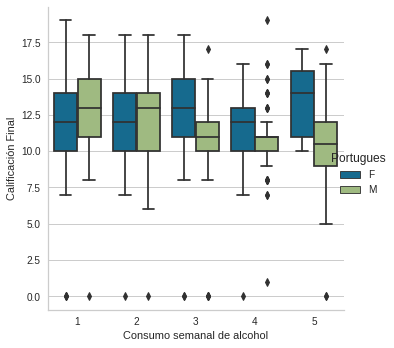

In [166]:
g21=sns.catplot(x="Walc", y="G3", hue="sex", data=Por_dataset,kind="box")
g21._legend.set_title("Portugues")
g21.set(xlabel="Consumo semanal de alcohol", ylabel = "Calificación Final")

## Influye el consumo de alcohol diario por edad y por veces que sale

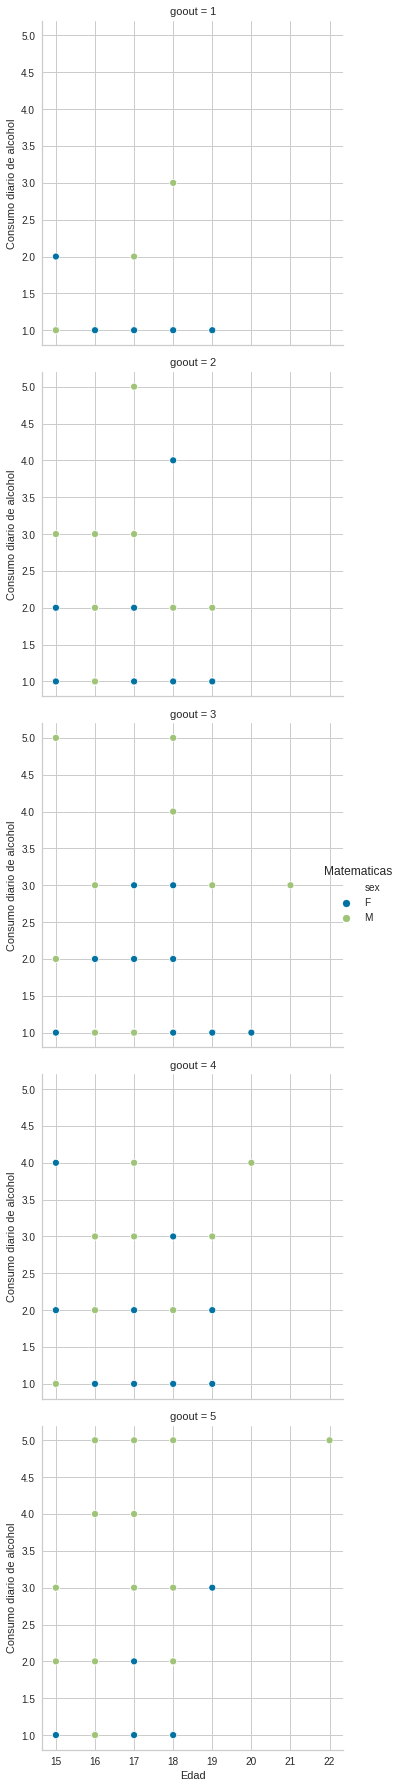

In [10]:
g22=sns.relplot(x="age",  
            y="Dalc", 
            hue="sex", 
            row="goout",
            data=Mat_dataset) 
g22._legend.set_title("Matematicas")
g22.set(xlabel="Edad", ylabel = "Consumo diario de alcohol")


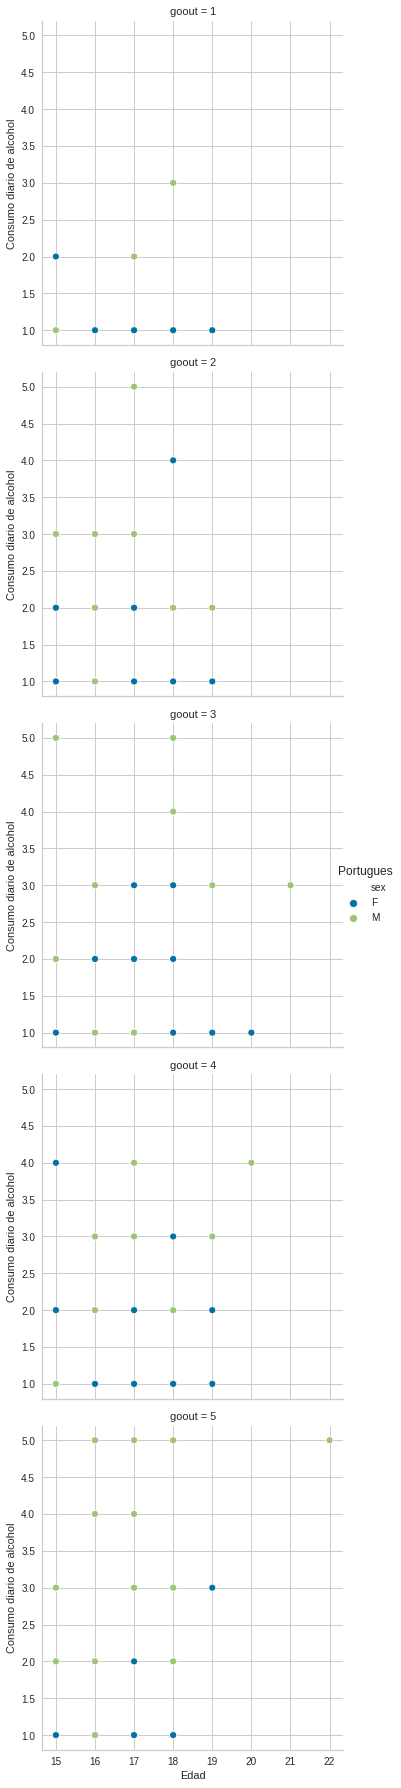

In [11]:
g22=sns.relplot(x="age",  
            y="Dalc", 
            hue="sex", 
            row="goout",
            data=Mat_dataset) 
g22._legend.set_title("Portugues")
g22.set(xlabel="Edad", ylabel = "Consumo diario de alcohol")


## Influye la mala relacion con la famiia con el consumo diario de alcohol

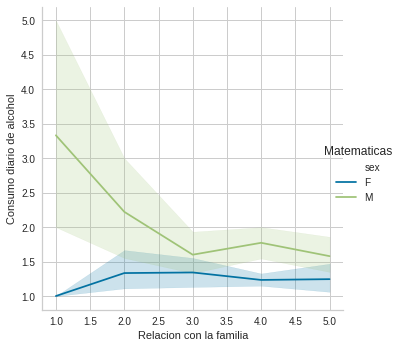

In [27]:
g23=sns.relplot(x="famrel", y="Dalc",hue="sex", data=Mat_dataset,kind="line")
g23._legend.set_title("Matematicas")
g23.set(xlabel="Relacion con la familia", ylabel = "Consumo diario de alcohol")


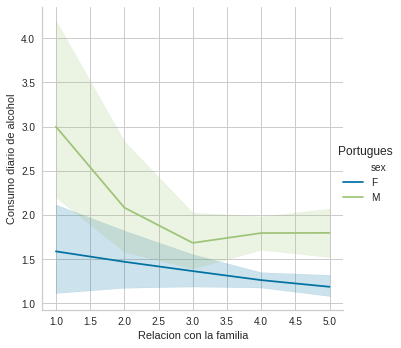

In [28]:
g24=sns.relplot(x="famrel", y="Dalc",hue="sex", data=Por_dataset,kind="line")
g24._legend.set_title("Portugues")
g24.set(xlabel="Relacion con la familia", ylabel = "Consumo diario de alcohol")


## Porcentaje por sexo mayor consumo diario

In [27]:
por_mat = Mat_dataset[Mat_dataset['Dalc']>=3]
por_mat = pd.DataFrame({'Porcentaje': por_mat.groupby(('sex')).size() / len(por_mat) * 100})
por_mat

,Porcentaje
sex,
F,18.181818
M,81.818182


In [26]:
por_port = Por_dataset[Por_dataset['Dalc']>=3]
por_port = pd.DataFrame({'Porcentaje': por_port.groupby(('sex')).size() / len(por_port) * 100})
por_port

,Porcentaje
sex,
F,25.974026
M,74.025974


## Porcentaje quien obtuvo mayor calificacion aprobatoria

In [28]:
cal_mat = Mat_dataset[Mat_dataset['G3']>=12]
cal_mat = pd.DataFrame({'Porcentaje': cal_mat.groupby(('sex')).size() / len(cal_mat) * 100})
cal_mat

,Porcentaje
sex,
F,45.679012
M,54.320988


In [29]:
cal_por = Por_dataset[Por_dataset['G3']>=12]
cal_por = pd.DataFrame({'Porcentaje': cal_por.groupby(('sex')).size() / len(cal_por) * 100})
cal_por

,Porcentaje
sex,
F,65.229885
M,34.770115


## Promedio de calificacion final por escuela 

In [45]:
gr_mat = Mat_dataset[Mat_dataset['school']=="GP"]
gr_mat2 = Mat_dataset[Mat_dataset['school']=="MS"]
grades=[gr_mat.G3.mean(),gr_mat2.G3.mean()]
grades = pd.DataFrame(data = grades, columns=['Promedio'], index=['GP','MS'])
grades

,Promedio
GP,10.489971
MS,9.847826


In [47]:
gr_por = Por_dataset[Por_dataset['school']=="GP"]
gr_por2 = Por_dataset[Por_dataset['school']=="MS"]
grades = [gr_por.G3.mean(),gr_por2.G3.mean()]
grades = pd.DataFrame(data = grades, columns=['Promedio'], index=['GP','MS'])
grades

,Promedio
GP,12.576832
MS,10.650442


## Porcentaje de consumo de alcohol diario(+3) por escuela

In [48]:
dschool_mat = Mat_dataset[Mat_dataset['Dalc']>=3]
dschool_mat = pd.DataFrame({'Porcentaje': dschool_mat.groupby(('school')).size() / len(dschool_mat) * 100})
dschool_mat

,Porcentaje
school,
GP,75.0
MS,25.0


In [49]:
dschool_por = Por_dataset[Por_dataset['Dalc']>=3]
dschool_por = pd.DataFrame({'Porcentaje': dschool_por.groupby(('school')).size() / len(dschool_por) * 100})
dschool_por

,Porcentaje
school,
GP,57.142857
MS,42.857143


## ¿Influye que tus padres vivan juntos?

In [53]:
par_mat = Mat_dataset[Mat_dataset['Pstatus']=="T"]
par_mat = pd.DataFrame({'Porcentaje': par_mat.groupby(('Dalc')).size() / len(par_mat) * 100})
par_mat



,Porcentaje
Dalc,
1,69.774011
2,19.774011
3,6.214689
4,1.977401
5,2.259887


In [55]:
par_mat2 = Mat_dataset[Mat_dataset['Pstatus']=="A"]
par_mat2 = pd.DataFrame({'Porcentaje': par_mat2.groupby(('Dalc')).size() / len(par_mat2) * 100})
par_mat2


,Porcentaje
Dalc,
1,70.731707
2,12.195122
3,9.756098
4,4.878049
5,2.439024


In [56]:
par_por = Por_dataset[Por_dataset['Pstatus']=="T"]
par_por = pd.DataFrame({'Porcentaje': par_por.groupby(('Dalc')).size() / len(par_por) * 100})
par_por



,Porcentaje
Dalc,
1,68.365554
2,19.683656
3,6.502636
4,2.811951
5,2.636204


In [57]:
par_por2 = Por_dataset[Por_dataset['Pstatus']=="A"]
par_por2 = pd.DataFrame({'Porcentaje': par_por2.groupby(('Dalc')).size() / len(par_por2) * 100})
par_por2



,Porcentaje
Dalc,
1,77.50
2,11.25
3,7.50
4,1.25
5,2.50


## Preprocesando datos

In [196]:
Mat_dataset_pp= Mat_dataset.iloc[:,:].values
Mat_dataset_pp

array([['GP', 'F', 18, ..., 5, 6, 6],
       ['GP', 'F', 17, ..., 5, 5, 6],
       ['GP', 'F', 15, ..., 7, 8, 10],
       ...,
       ['MS', 'M', 21, ..., 10, 8, 7],
       ['MS', 'M', 18, ..., 11, 12, 10],
       ['MS', 'M', 19, ..., 8, 9, 9]], dtype=object)

In [197]:
le_X0 = preprocessing.LabelEncoder()

Mat_dataset_pp[:,0] = le_X0.fit_transform(Mat_dataset_pp[:,0])

In [198]:
le_X1 = preprocessing.LabelEncoder()
Mat_dataset_pp[:,1] = le_X1.fit_transform(Mat_dataset_pp[:,1])

In [199]:
le_X3 = preprocessing.LabelEncoder()
Mat_dataset_pp[:,3] = le_X3.fit_transform(Mat_dataset_pp[:,3])

In [200]:
le_X4 = preprocessing.LabelEncoder()
Mat_dataset_pp[:,4] = le_X4.fit_transform(Mat_dataset_pp[:,4])

In [201]:
le_X5 = preprocessing.LabelEncoder()
Mat_dataset_pp[:,5] = le_X5.fit_transform(Mat_dataset_pp[:,5])

In [202]:
le_X8 = preprocessing.LabelEncoder()
Mat_dataset_pp[:,8] = le_X8.fit_transform(Mat_dataset_pp[:,8])

In [203]:
le_X9 = preprocessing.LabelEncoder()
Mat_dataset_pp[:,9] = le_X9.fit_transform(Mat_dataset_pp[:,9])

In [204]:
le_X10 = preprocessing.LabelEncoder()
Mat_dataset_pp[:,10] = le_X10.fit_transform(Mat_dataset_pp[:,10])

In [205]:
le_X11 = preprocessing.LabelEncoder()
Mat_dataset_pp[:,11] = le_X11.fit_transform(Mat_dataset_pp[:,11])

In [206]:
le_X15 = preprocessing.LabelEncoder()
Mat_dataset_pp[:,15] = le_X15.fit_transform(Mat_dataset_pp[:,15])

In [207]:
le_X16 = preprocessing.LabelEncoder()
Mat_dataset_pp[:,16] = le_X16.fit_transform(Mat_dataset_pp[:,16])

In [208]:
le_X17 = preprocessing.LabelEncoder()
Mat_dataset_pp[:,17] = le_X17.fit_transform(Mat_dataset_pp[:,17])

In [209]:
le_X18 = preprocessing.LabelEncoder()
Mat_dataset_pp[:,18] = le_X18.fit_transform(Mat_dataset_pp[:,18])

In [210]:
le_X19 = preprocessing.LabelEncoder()
Mat_dataset_pp[:,19] = le_X19.fit_transform(Mat_dataset_pp[:,19])

In [211]:
le_X20 = preprocessing.LabelEncoder()
Mat_dataset_pp[:,20] = le_X20.fit_transform(Mat_dataset_pp[:,20])

In [212]:
le_X21 = preprocessing.LabelEncoder()
Mat_dataset_pp[:,21] = le_X21.fit_transform(Mat_dataset_pp[:,21])

In [213]:
le_X22 = preprocessing.LabelEncoder()
Mat_dataset_pp[:,22] = le_X22.fit_transform(Mat_dataset_pp[:,22])

In [214]:
Mat_dataset_pp

array([[0, 0, 18, ..., 5, 6, 6],
       [0, 0, 17, ..., 5, 5, 6],
       [0, 0, 15, ..., 7, 8, 10],
       ...,
       [1, 1, 21, ..., 10, 8, 7],
       [1, 1, 18, ..., 11, 12, 10],
       [1, 1, 19, ..., 8, 9, 9]], dtype=object)

## Portugues encoder

In [216]:
Por_dataset_pp= Por_dataset.iloc[:,:].values
Por_dataset_pp

array([['GP', 'F', 18, ..., 0, 11, 11],
       ['GP', 'F', 17, ..., 9, 11, 11],
       ['GP', 'F', 15, ..., 12, 13, 12],
       ...,
       ['MS', 'F', 18, ..., 11, 12, 9],
       ['MS', 'M', 17, ..., 10, 10, 10],
       ['MS', 'M', 18, ..., 10, 11, 11]], dtype=object)

In [217]:
le_X0p = preprocessing.LabelEncoder()
Por_dataset_pp[:,0] = le_X0p.fit_transform(Por_dataset_pp[:,0])

In [218]:
le_X1p = preprocessing.LabelEncoder()
Por_dataset_pp[:,1] = le_X1p.fit_transform(Por_dataset_pp[:,1])

In [219]:
le_X3p = preprocessing.LabelEncoder()
Por_dataset_pp[:,3] = le_X3p.fit_transform(Por_dataset_pp[:,3])

In [220]:
le_X4p = preprocessing.LabelEncoder()
Por_dataset_pp[:,4] = le_X4p.fit_transform(Por_dataset_pp[:,4])

In [221]:
le_X5p = preprocessing.LabelEncoder()
Por_dataset_pp[:,5] = le_X5p.fit_transform(Por_dataset_pp[:,5])

In [222]:
le_X8p = preprocessing.LabelEncoder()
Por_dataset_pp[:,8] = le_X8p.fit_transform(Por_dataset_pp[:,8])

In [223]:
le_X9p = preprocessing.LabelEncoder()
Por_dataset_pp[:,9] = le_X9p.fit_transform(Por_dataset_pp[:,9])

In [224]:
le_X10p = preprocessing.LabelEncoder()
Por_dataset_pp[:,10] = le_X10p.fit_transform(Por_dataset_pp[:,10])

In [225]:
le_X11p = preprocessing.LabelEncoder()
Por_dataset_pp[:,11] = le_X11p.fit_transform(Por_dataset_pp[:,11])

In [226]:
le_X15p = preprocessing.LabelEncoder()
Por_dataset_pp[:,15] = le_X15p.fit_transform(Por_dataset_pp[:,15])

In [227]:
le_X16p = preprocessing.LabelEncoder()
Por_dataset_pp[:,16] = le_X16p.fit_transform(Por_dataset_pp[:,16])

In [228]:
le_X17p = preprocessing.LabelEncoder()
Por_dataset_pp[:,17] = le_X17p.fit_transform(Por_dataset_pp[:,17])

In [229]:
le_X18p = preprocessing.LabelEncoder()
Por_dataset_pp[:,18] = le_X18p.fit_transform(Por_dataset_pp[:,18])

In [230]:
le_X19p = preprocessing.LabelEncoder()
Por_dataset_pp[:,19] = le_X19p.fit_transform(Por_dataset_pp[:,19])

In [231]:
le_X20p = preprocessing.LabelEncoder()
Por_dataset_pp[:,20] = le_X20p.fit_transform(Por_dataset_pp[:,20])

In [232]:
le_X21p = preprocessing.LabelEncoder()
Por_dataset_pp[:,21] = le_X21p.fit_transform(Por_dataset_pp[:,21])

In [233]:
le_X22p = preprocessing.LabelEncoder()
Por_dataset_pp[:,22] = le_X22p.fit_transform(Por_dataset_pp[:,22])

In [234]:
Por_dataset_pp

array([[0, 0, 18, ..., 0, 11, 11],
       [0, 0, 17, ..., 9, 11, 11],
       [0, 0, 15, ..., 12, 13, 12],
       ...,
       [1, 0, 18, ..., 11, 12, 9],
       [1, 1, 17, ..., 10, 10, 10],
       [1, 1, 18, ..., 10, 11, 11]], dtype=object)

In [10]:
# pca = PCA(n_components = 32)
# Mat_dataset_pca = pca.fit_transform(Mat_dataset_pp)
# Mat_dataset_pca

In [11]:
# explained_variance = pca.explained_variance_ratio_
# explained_variance

In [12]:
# pca = PCA(n_components = 2)
# Mat_dataset_pca = pca.fit_transform(Mat_dataset_pp)
# Mat_dataset_pca

In [13]:
# pca = PCA(n_components = 32)
# Por_dataset_pca = pca.fit_transform(Por_dataset_pp)
# Por_dataset_pca 

In [14]:
# explained_variance = pca.explained_variance_ratio_
# explained_variance

In [15]:
# pca = PCA(n_components = 6)
# Por_dataset_pca = pca.fit_transform(Por_dataset_pp)
# Por_dataset_pca

# Clustering :

# Matematicas

In [111]:
Mat_dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Usando distintas distancias
En el clustering jerarquico

braycurtis


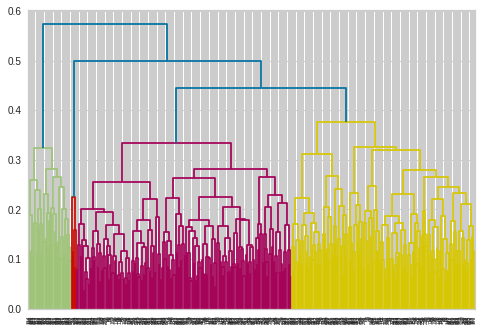

canberra


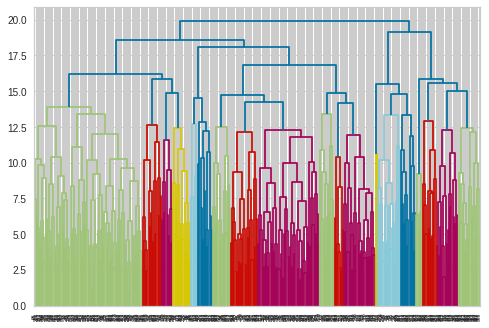

chebyshev


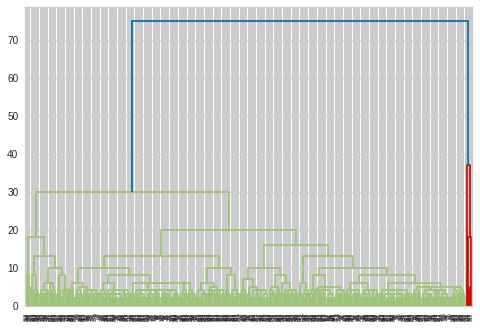

cityblock


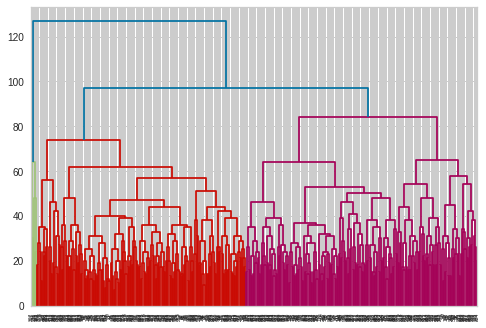

correlation


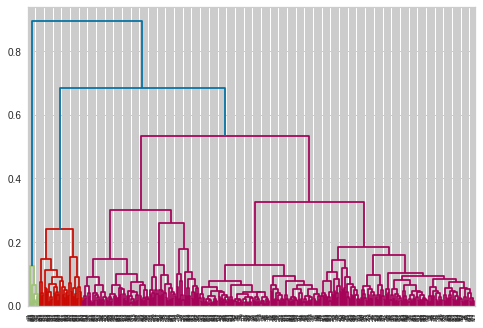

cosine


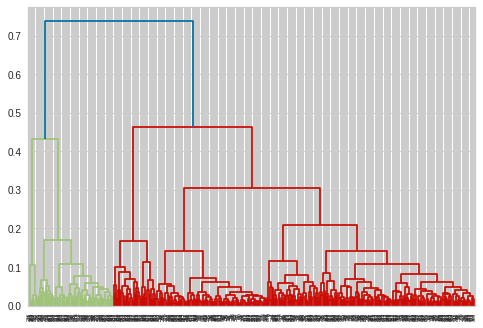

dice


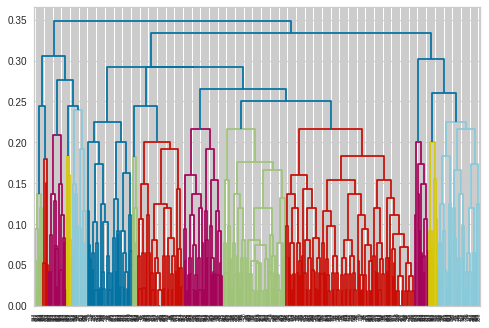

euclidean


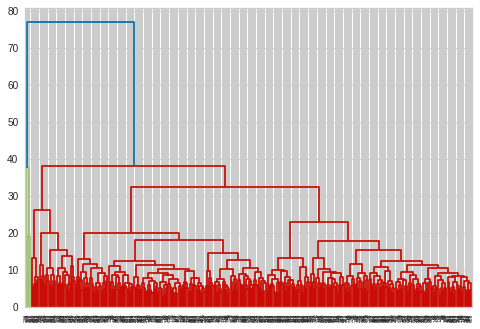

hamming


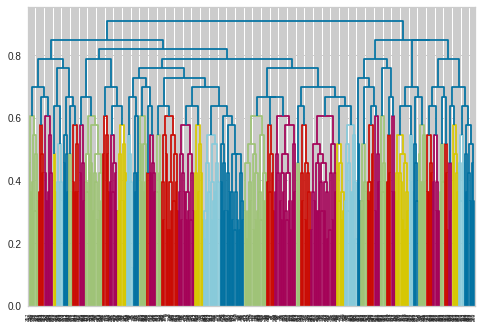

jaccard


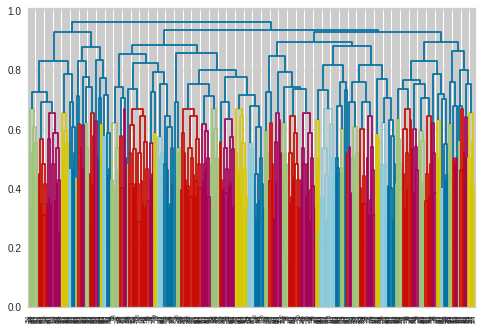

jensenshannon


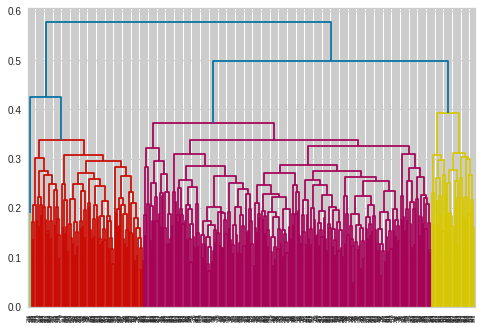

kulsinski


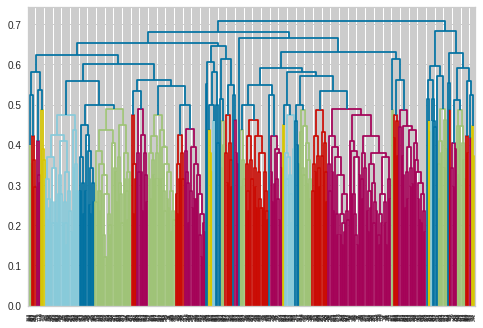

mahalanobis


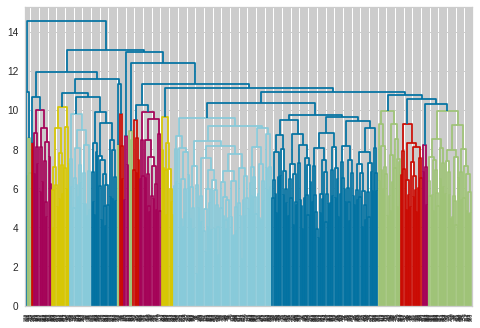

matching


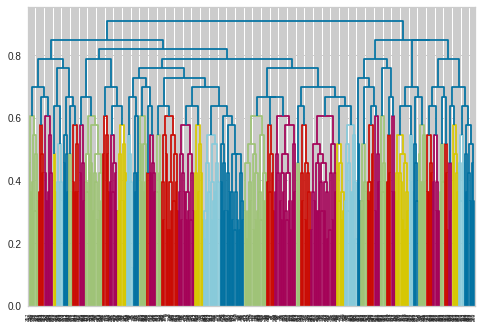

minkowski


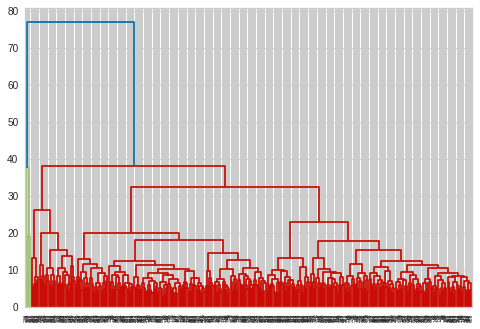

rogerstanimoto


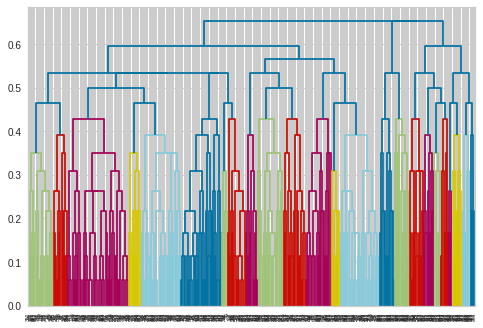

russellrao


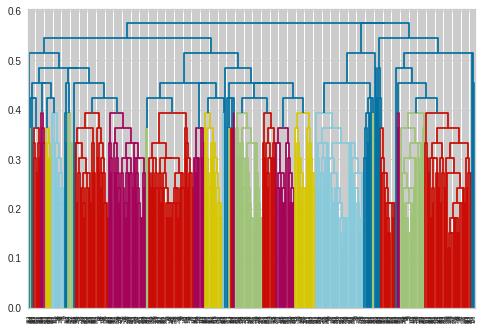

seuclidean


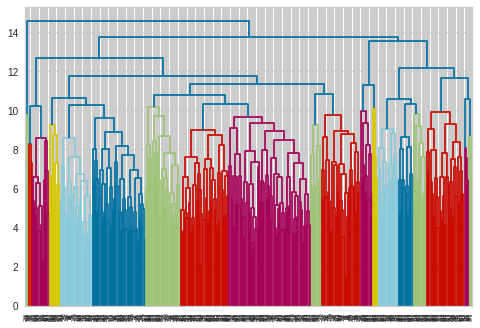

sokalmichener


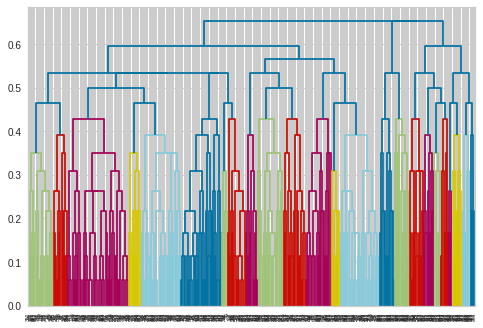

sokalsneath


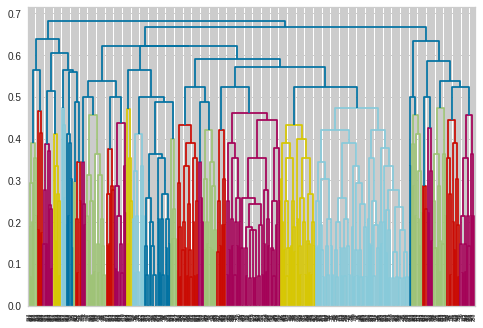

sqeuclidean


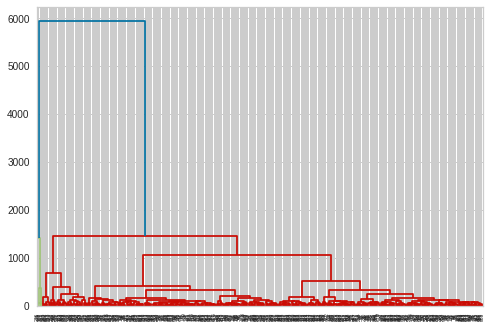

yule


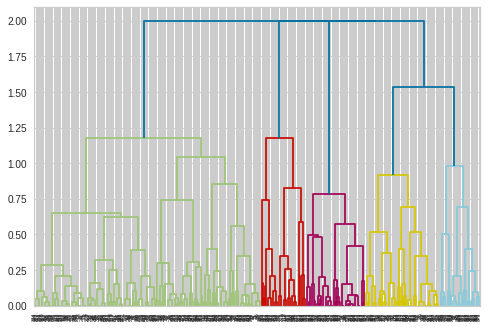

In [17]:
metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']
for i in metrics:
    print(i)
    M = sch.linkage(Mat_dataset_pp, method='complete', metric=i)
    sch.dendrogram(M)
    plt.show()

### Cual fue la mejor distancia?

## Revisando con el metodo del codo
### Concuerda con lo de arriba?

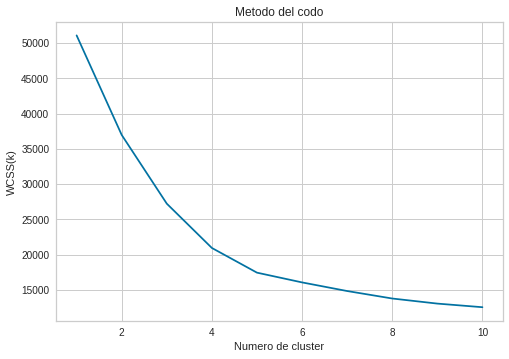

In [112]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Mat_dataset_pp)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Metodo del codo")
plt.xlabel("Numero de cluster")
plt.ylabel("WCSS(k)")
plt.show()

## Visualizando Shilhouette

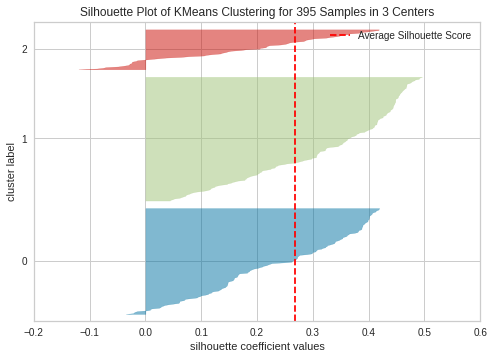

In [118]:
model3 = SilhouetteVisualizer(KMeans(3, random_state=42), colors='yellowbrick')
model3.fit(Mat_dataset_pp)        
model3.show()

In [119]:
model3.silhouette_score_

0.2677008478004781

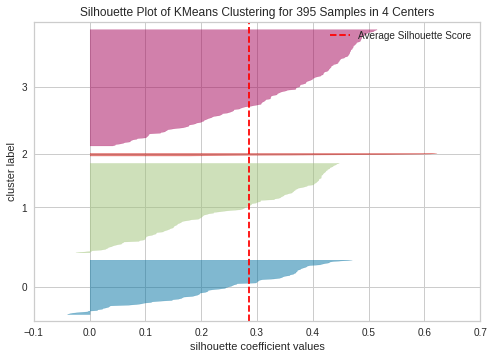

In [120]:
model4 = SilhouetteVisualizer(KMeans(4, random_state=42), colors='yellowbrick')
model4.fit(Mat_dataset_pp)        
model4.show()

In [121]:
model4.silhouette_score_

0.2862169493286012

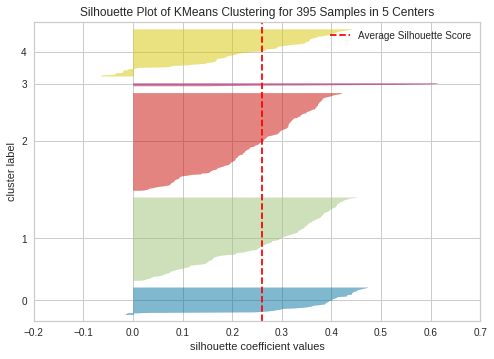

In [122]:
model5 = SilhouetteVisualizer(KMeans(5, random_state=42), colors='yellowbrick')
model5.fit(Mat_dataset_pp)        
model5.show()

In [124]:
model5.silhouette_score_

0.260252770110775

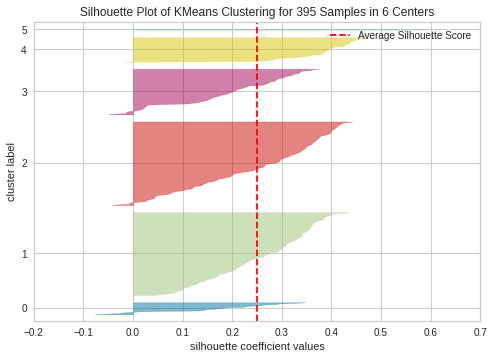

In [125]:
model6 = SilhouetteVisualizer(KMeans(6, random_state=42), colors='yellowbrick')
model6.fit(Mat_dataset_pp)        
model6.show()

In [126]:
model6.silhouette_score_

0.24981628294328598

In [127]:
kmeans = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(Mat_dataset_pp)
y_kmeans

array([1, 1, 3, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0,
       0, 0, 1, 3, 0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1,
       3, 1, 3, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 3, 0, 1, 3, 0, 0, 1, 0, 1, 1, 1, 0,
       3, 3, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 3, 0, 0, 3, 0, 3, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 3, 1, 0, 1, 1, 1, 0, 1, 1,
       3, 3, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 3, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 3, 0, 3, 0, 0, 2, 3, 3, 0, 0, 1, 1, 3, 1, 3, 3, 0, 0, 0, 3,
       3, 1, 0, 1, 1, 3, 0, 3, 1, 3, 1, 1, 3, 3, 0, 3, 3, 0, 3, 3, 1, 1,
       1, 1, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 1, 3, 0,
       1, 0, 1, 0, 0, 3, 1, 0, 1, 1, 1, 1, 0, 1, 0, 3, 0, 1, 3, 1, 0, 1,
       1, 0, 1, 3, 3, 1, 3, 0, 0, 0, 1, 0, 2, 3, 3, 3, 3, 3, 0, 1, 1, 0,
       0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 3, 0, 0, 3,

In [136]:
centroids_math  = kmeans.cluster_centers_
centroids_math = centroids_math.round()
CentroidsmathDF = pd.DataFrame(centroids_math)
CentroidsmathDF = CentroidsmathDF.astype(int)
CentroidsmathDF

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0,1,16,1,0,1,3,3,2,2,...,4,3,3,1,2,4,3,14,14,14
1,0,0,17,1,0,1,2,2,2,2,...,4,3,3,1,2,4,2,8,7,6
2,0,0,18,1,0,1,3,3,2,3,...,4,2,3,1,2,4,53,10,10,9
3,0,0,17,1,0,1,3,3,2,2,...,4,3,3,2,3,3,15,10,10,10


In [275]:
labecentroid =CentroidsmathDF.values
labecentroid

array([[ 0,  1, 16,  1,  0,  1,  3,  3,  2,  2,  1,  1,  1,  2,  0,  0,
         1,  1,  1,  1,  1,  1,  0,  4,  3,  3,  1,  2,  4,  3, 14, 14,
        14],
       [ 0,  0, 17,  1,  0,  1,  2,  2,  2,  2,  1,  1,  2,  2,  1,  0,
         1,  0,  0,  1,  1,  1,  0,  4,  3,  3,  1,  2,  4,  2,  8,  7,
         6],
       [ 0,  0, 18,  1,  0,  1,  3,  3,  2,  3,  2,  1,  1,  2,  0,  0,
         1,  0,  0,  1,  1,  1,  1,  4,  2,  3,  1,  2,  4, 53, 10, 10,
         9],
       [ 0,  0, 17,  1,  0,  1,  3,  3,  2,  2,  1,  1,  1,  2,  1,  0,
         1,  0,  1,  1,  1,  1,  0,  4,  3,  3,  2,  3,  3, 15, 10, 10,
        10]])

In [289]:
a0 = le_X0.inverse_transform(labecentroid[:,0])
CentroidsmathDF.iloc[:,0]=CentroidsmathDF.iloc[:,0].astype(str)
CentroidsmathDF.iloc[:,0] = a0

In [291]:
a1 = le_X1.inverse_transform(labecentroid[:,1])
CentroidsmathDF.iloc[:,1]=CentroidsmathDF.iloc[:,1].astype(str)
CentroidsmathDF.iloc[:,1] = a1

In [292]:
a3 = le_X3.inverse_transform(labecentroid[:,3])
CentroidsmathDF.iloc[:,3]=CentroidsmathDF.iloc[:,3].astype(str)
CentroidsmathDF.iloc[:,3] = a3

In [293]:
a4 = le_X4.inverse_transform(labecentroid[:,4])
CentroidsmathDF.iloc[:,4]=CentroidsmathDF.iloc[:,4].astype(str)
CentroidsmathDF.iloc[:,4] = a4

In [294]:
a5 = le_X5.inverse_transform(labecentroid[:,5])
CentroidsmathDF.iloc[:,5]=CentroidsmathDF.iloc[:,5].astype(str)
CentroidsmathDF.iloc[:,5] = a5

In [295]:
a8 = le_X8.inverse_transform(labecentroid[:,8])
CentroidsmathDF.iloc[:,8]=CentroidsmathDF.iloc[:,8].astype(str)
CentroidsmathDF.iloc[:,8] = a8

In [296]:
a9 = le_X9.inverse_transform(labecentroid[:,9])
CentroidsmathDF.iloc[:,9]=CentroidsmathDF.iloc[:,9].astype(str)
CentroidsmathDF.iloc[:,9] = a9

In [297]:
a10 = le_X10.inverse_transform(labecentroid[:,10])
CentroidsmathDF.iloc[:,10]=CentroidsmathDF.iloc[:,10].astype(str)
CentroidsmathDF.iloc[:,10] = a10

In [298]:
a11 = le_X11.inverse_transform(labecentroid[:,11])
CentroidsmathDF.iloc[:,11]=CentroidsmathDF.iloc[:,11].astype(str)
CentroidsmathDF.iloc[:,11] = a11

In [299]:
a15 = le_X15.inverse_transform(labecentroid[:,15])
CentroidsmathDF.iloc[:,15]=CentroidsmathDF.iloc[:,15].astype(str)
CentroidsmathDF.iloc[:,15] = a15

In [300]:
a16 = le_X16.inverse_transform(labecentroid[:,16])
CentroidsmathDF.iloc[:,16]=CentroidsmathDF.iloc[:,16].astype(str)
CentroidsmathDF.iloc[:,16] = a16

In [301]:
a17 = le_X17.inverse_transform(labecentroid[:,17])
CentroidsmathDF.iloc[:,17]=CentroidsmathDF.iloc[:,17].astype(str)
CentroidsmathDF.iloc[:,17] = a17

In [302]:
a18 = le_X18.inverse_transform(labecentroid[:,18])
CentroidsmathDF.iloc[:,18]=CentroidsmathDF.iloc[:,18].astype(str)
CentroidsmathDF.iloc[:,18] = a18

In [303]:
a19 = le_X19.inverse_transform(labecentroid[:,19])
CentroidsmathDF.iloc[:,19]=CentroidsmathDF.iloc[:,19].astype(str)
CentroidsmathDF.iloc[:,19] = a19

In [304]:
a20 = le_X20.inverse_transform(labecentroid[:,20])
CentroidsmathDF.iloc[:,20]=CentroidsmathDF.iloc[:,20].astype(str)
CentroidsmathDF.iloc[:,20] = a20

In [305]:
a21 = le_X21.inverse_transform(labecentroid[:,21])
CentroidsmathDF.iloc[:,21]=CentroidsmathDF.iloc[:,21].astype(str)
CentroidsmathDF.iloc[:,21] = a21

In [306]:
a22 = le_X22.inverse_transform(labecentroid[:,22])
CentroidsmathDF.iloc[:,22]=CentroidsmathDF.iloc[:,22].astype(str)
CentroidsmathDF.iloc[:,22] = a22

In [308]:
CentroidsmathDF.to_csv("Centroidesmath.csv")

## SVD (PCA)
### Hay que justificar por que usamos PCA, eso lo podemos hacer en el reporte y aqui tambien
### corroborar con SVD si $\Sigma$ nos dice lo mismo que las vanrianzas explicadas

In [25]:
# pca = PCA(n_components = 32)
pca = PCA()
Mat_dataset_pca = pca.fit_transform(Mat_dataset_pp)
Mat_dataset_pca

array([[ 0.37260727,  8.36685943, -1.09539037, ...,  0.5158833 ,
        -0.18814546, -0.10457666],
       [-1.71156558,  9.08118102, -1.20888769, ...,  0.18318245,
        -0.13880028, -0.15444798],
       [ 4.33845936,  3.76269212, -2.59154155, ..., -0.24685524,
         0.10436793, -0.14833829],
       ...,
       [-2.59426841,  4.71891344,  0.63663173, ..., -0.14961012,
         0.31239932, -0.28297306],
       [-5.67774168, -0.34968485, -0.81824607, ..., -0.07976789,
         0.22459942, -0.08600447],
       [-0.6210332 ,  3.53955244, -1.82951963, ..., -0.0682145 ,
         0.55012156, -0.10057157]])

In [26]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.95736470e-01, 3.26559116e-01, 2.37334752e-02, 2.01210702e-02,
       1.97576107e-02, 1.57347651e-02, 1.14940433e-02, 1.05494381e-02,
       1.01493094e-02, 8.42848946e-03, 8.11322038e-03, 5.99724157e-03,
       5.68219417e-03, 4.94349314e-03, 4.32811712e-03, 3.49888589e-03,
       3.24253760e-03, 2.85692415e-03, 2.56025791e-03, 2.23069763e-03,
       1.87936502e-03, 1.72328832e-03, 1.69684390e-03, 1.45930411e-03,
       1.27665282e-03, 1.20749476e-03, 1.12191392e-03, 1.03964930e-03,
       7.96207470e-04, 6.85801271e-04, 6.03123924e-04, 5.03651751e-04,
       2.89346010e-04])

In [27]:
pca = PCA(n_components = 2)
Mat_dataset_pca = pca.fit_transform(Mat_dataset_pp)
Mat_dataset_pca

array([[ 3.72607270e-01,  8.36685943e+00],
       [-1.71156558e+00,  9.08118102e+00],
       [ 4.33845936e+00,  3.76269212e+00],
       [-3.81720389e+00, -6.95897705e+00],
       [-1.69138321e+00,  2.88232093e+00],
       [ 4.22886208e+00, -7.63062492e+00],
       [-5.80092326e+00, -1.60354661e+00],
       [ 4.06184403e-01,  8.33916417e+00],
       [-5.80448180e+00, -1.24488152e+01],
       [-5.86049794e+00, -7.11462813e+00],
       [-5.64569527e+00,  2.65374930e+00],
       [-1.77467932e+00, -1.46986952e+00],
       [-3.80021058e+00, -5.78637447e+00],
       [-3.73040514e+00,  2.73133990e-01],
       [-5.83852303e+00, -8.25472686e+00],
       [-1.75193436e+00, -5.79680865e+00],
       [ 3.10792985e-01, -5.51072431e+00],
       [-1.69935210e+00,  1.91954014e+00],
       [ 1.03924306e+01,  9.36052211e+00],
       [-1.65935507e+00,  1.98044847e+00],
       [-5.73425173e+00, -6.25428501e+00],
       [-5.79726255e+00, -6.18672700e+00],
       [-3.77635988e+00, -8.19735865e+00],
       [-5.

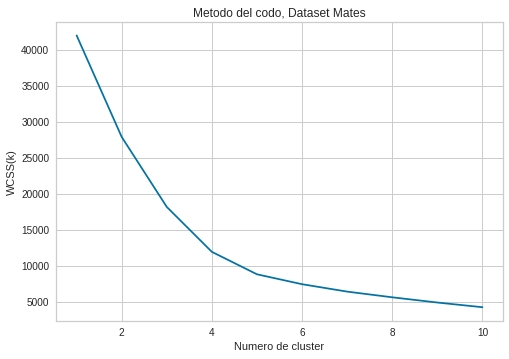

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Mat_dataset_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Metodo del codo, Dataset Mates")
plt.xlabel("Numero de cluster")
plt.ylabel("WCSS(k)")
plt.show()

In [29]:
Mat_dataset_pca

array([[ 3.72607270e-01,  8.36685943e+00],
       [-1.71156558e+00,  9.08118102e+00],
       [ 4.33845936e+00,  3.76269212e+00],
       [-3.81720389e+00, -6.95897705e+00],
       [-1.69138321e+00,  2.88232093e+00],
       [ 4.22886208e+00, -7.63062492e+00],
       [-5.80092326e+00, -1.60354661e+00],
       [ 4.06184403e-01,  8.33916417e+00],
       [-5.80448180e+00, -1.24488152e+01],
       [-5.86049794e+00, -7.11462813e+00],
       [-5.64569527e+00,  2.65374930e+00],
       [-1.77467932e+00, -1.46986952e+00],
       [-3.80021058e+00, -5.78637447e+00],
       [-3.73040514e+00,  2.73133990e-01],
       [-5.83852303e+00, -8.25472686e+00],
       [-1.75193436e+00, -5.79680865e+00],
       [ 3.10792985e-01, -5.51072431e+00],
       [-1.69935210e+00,  1.91954014e+00],
       [ 1.03924306e+01,  9.36052211e+00],
       [-1.65935507e+00,  1.98044847e+00],
       [-5.73425173e+00, -6.25428501e+00],
       [-5.79726255e+00, -6.18672700e+00],
       [-3.77635988e+00, -8.19735865e+00],
       [-5.

In [30]:
kmeans = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(Mat_dataset_pca)
y_kmeans

array([1, 1, 3, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0,
       0, 0, 1, 3, 0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1,
       3, 1, 3, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 3, 0, 1, 3, 0, 0, 3, 0, 1, 1, 1, 0,
       3, 3, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 3, 0, 0, 3, 0, 3, 1, 0, 0, 0,
       0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 1, 0, 1, 1, 1, 0, 1, 1,
       3, 3, 1, 1, 1, 1, 0, 0, 1, 3, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 3, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 3, 0, 3, 0, 0, 2, 3, 3, 0, 0, 1, 1, 3, 1, 3, 3, 0, 0, 0, 3,
       3, 1, 0, 1, 1, 3, 0, 3, 1, 3, 1, 1, 3, 3, 0, 3, 3, 0, 3, 3, 1, 1,
       1, 1, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 1, 3, 0,
       1, 0, 1, 0, 0, 3, 1, 0, 1, 1, 1, 1, 0, 1, 0, 3, 0, 1, 3, 1, 0, 1,
       1, 0, 1, 3, 3, 1, 3, 0, 0, 0, 1, 0, 2, 3, 3, 3, 3, 3, 0, 1, 1, 0,
       0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 3, 0, 0, 3,

In [31]:
centroids_mat_pca = kmeans.cluster_centers_
centroids_mat_pca = centroids_mat_pca.round()
centroids_mat_pca_df = pd.DataFrame(centroids_mat_pca)
centroids_mat_pca_df

,0,1
0,-3.0,-5.0
1,-3.0,6.0
2,47.0,1.0
3,9.0,1.0


# Portugues

In [32]:
Por_dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## Clustering Jerarquico
### con distintas distancias

braycurtis


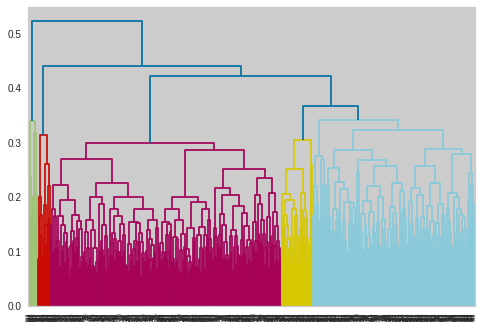

canberra


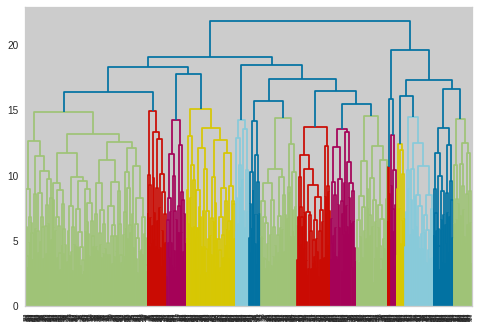

chebyshev


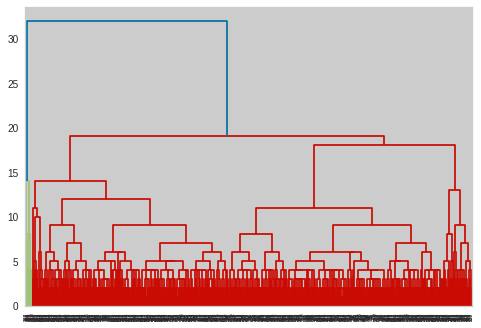

cityblock


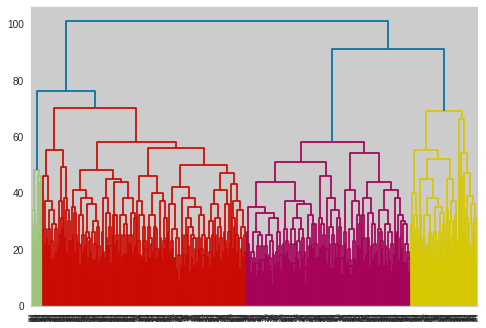

correlation


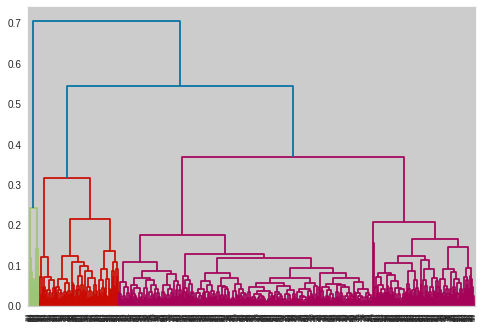

cosine


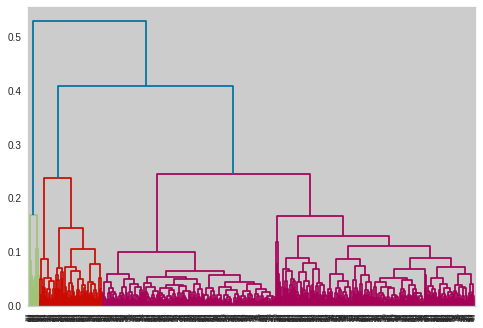

dice


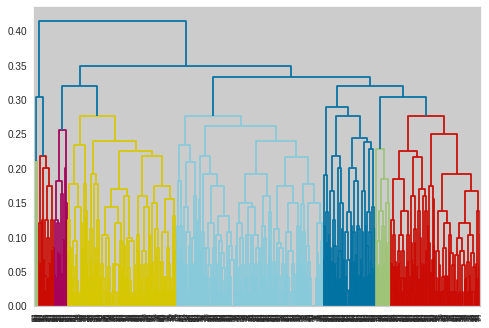

euclidean


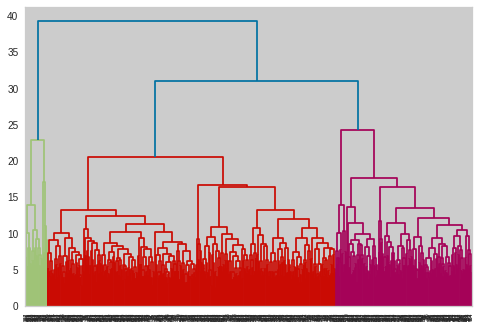

hamming


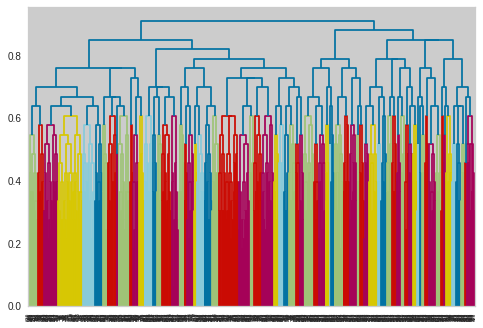

jaccard


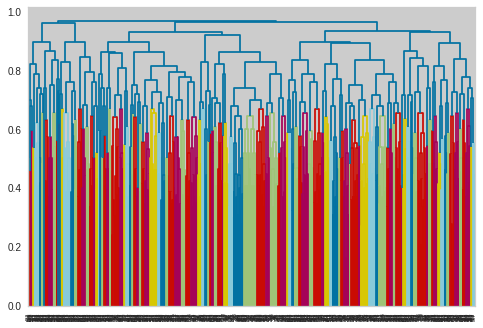

jensenshannon


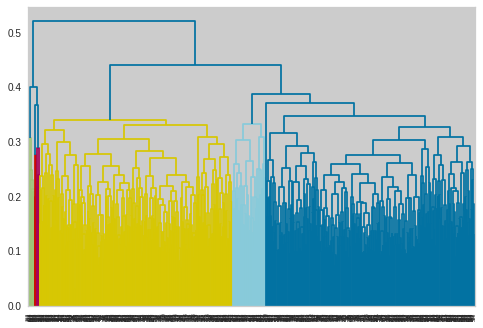

kulsinski


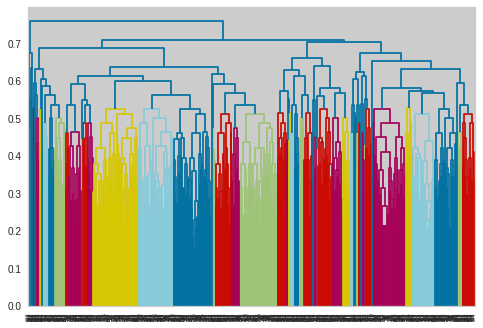

mahalanobis


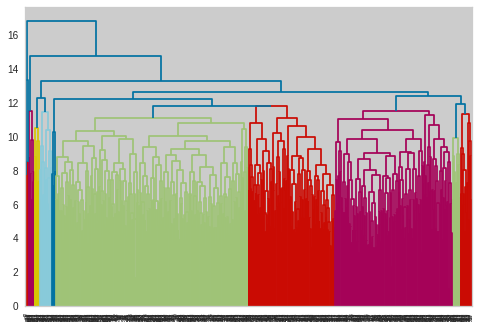

matching


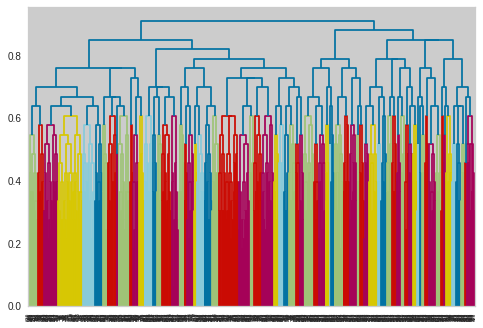

minkowski


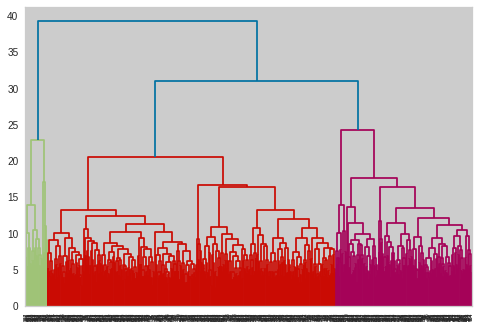

rogerstanimoto


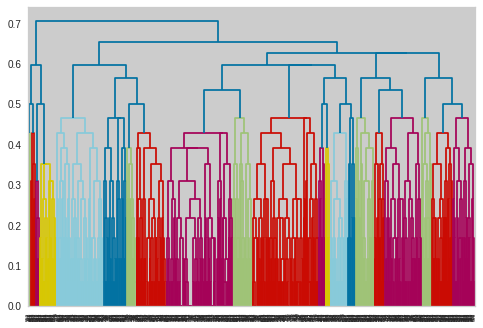

russellrao


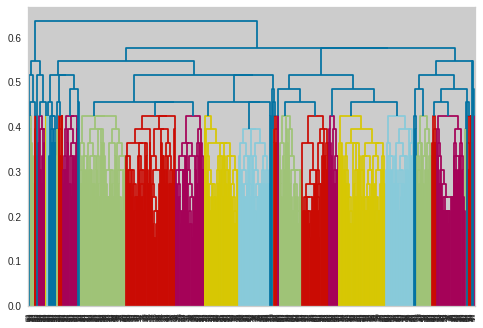

seuclidean


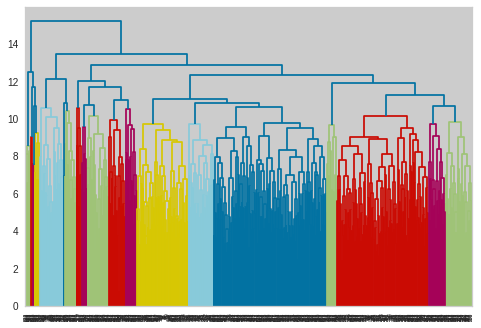

sokalmichener


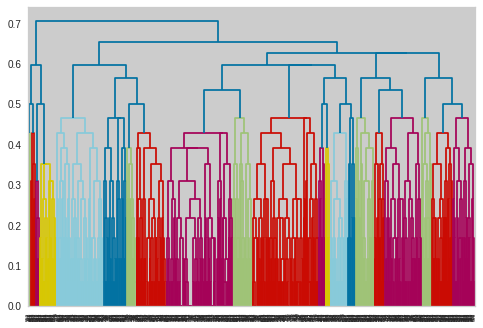

sokalsneath


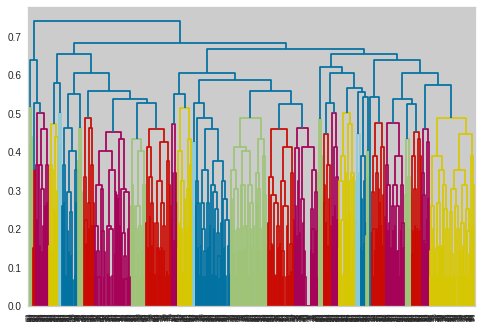

sqeuclidean


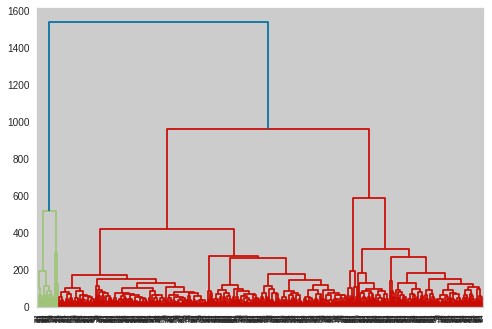

yule


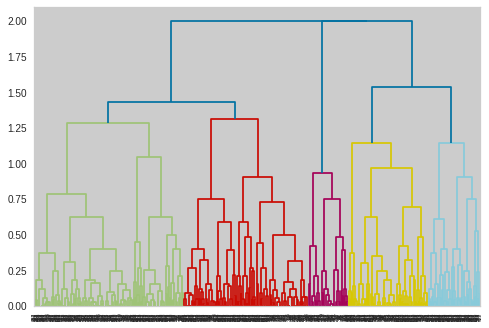

In [33]:
metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']
for i in metrics:
    print(i)
    P = sch.linkage(Por_dataset_pp, method='complete', metric=i)
    sch.dendrogram(P)
    plt.show()

## Metodo del codo

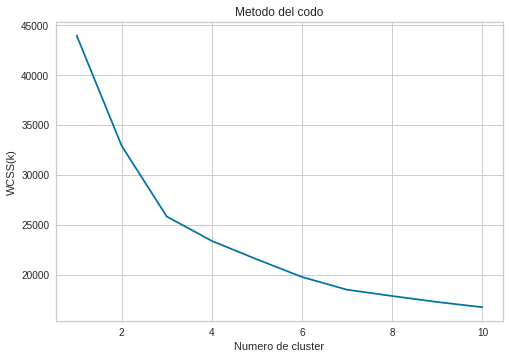

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Por_dataset_pp)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Metodo del codo")
plt.xlabel("Numero de cluster")
plt.ylabel("WCSS(k)")
plt.show()

## Silhouette

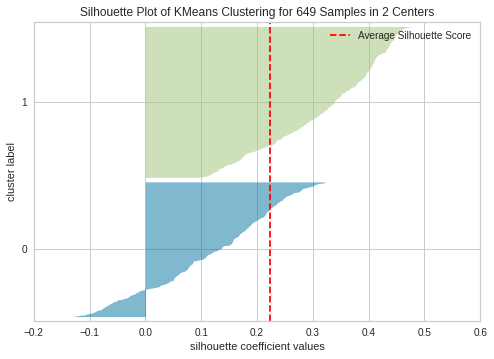

In [309]:
model2p = SilhouetteVisualizer(KMeans(2, random_state=42), colors='yellowbrick')
model2p.fit(Por_dataset_pp)        
model2p.show()

In [310]:
model2p.silhouette_score_

0.2227881694164871

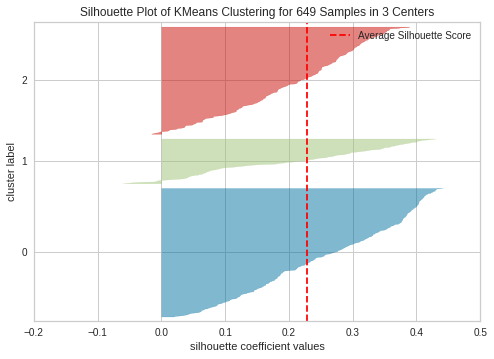

In [311]:
model3p = SilhouetteVisualizer(KMeans(3, random_state=42), colors='yellowbrick')
model3p.fit(Por_dataset_pp)        
model3p.show()

In [312]:
model3p.silhouette_score_

0.228602161839032

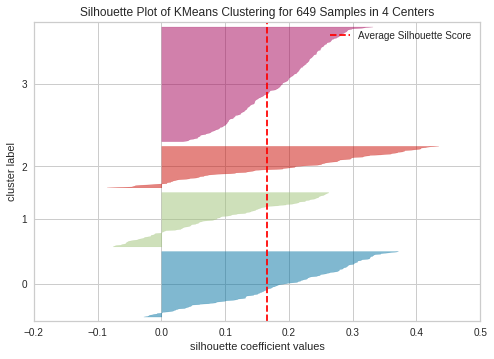

In [313]:
model4p = SilhouetteVisualizer(KMeans(4, random_state=42), colors='yellowbrick')
model4p.fit(Por_dataset_pp)        
model4p.show()

In [314]:
model4p.silhouette_score_

0.16587408803837347

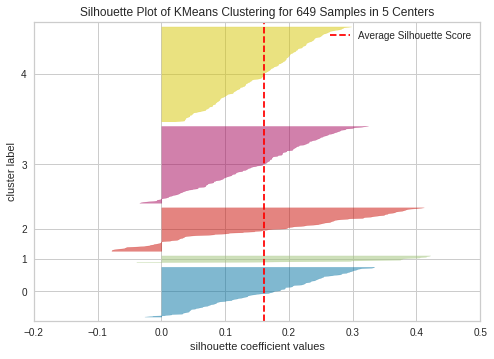

In [316]:
model5p = SilhouetteVisualizer(KMeans(5, random_state=42), colors='yellowbrick')
model5p.fit(Por_dataset_pp)        
model5p.show()

In [317]:
model5p.silhouette_score_

0.16052122362538662

In [341]:
kmeans_por = KMeans(n_clusters = 3, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
Por_y_kmeans = kmeans_por.fit_predict(Por_dataset_pp)
Por_y_kmeans

array([2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2,
       1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0,
       0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1,
       1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 1,
       0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0,

In [342]:
centroids_por  = kmeans_por.cluster_centers_
centroids_por = centroids_por.round()
CentroidsporDF = pd.DataFrame(centroids_por)
CentroidsporDF = CentroidsporDF.astype(int)
CentroidsporDF

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0,0,17,1,0,1,3,3,2,2,...,4,3,3,1,2,3,2,14,14,14
1,0,0,17,1,0,1,2,2,2,2,...,4,3,3,2,3,4,12,10,10,11
2,1,0,17,1,0,1,2,2,2,2,...,4,3,3,2,2,4,2,9,9,9


In [343]:
labecentroid =CentroidsporDF.values
labecentroid

array([[ 0,  0, 17,  1,  0,  1,  3,  3,  2,  2,  1,  1,  1,  2,  0,  0,
         1,  0,  1,  1,  1,  1,  0,  4,  3,  3,  1,  2,  3,  2, 14, 14,
        14],
       [ 0,  0, 17,  1,  0,  1,  2,  2,  2,  2,  1,  1,  2,  2,  0,  0,
         1,  0,  0,  1,  1,  1,  0,  4,  3,  3,  2,  3,  4, 12, 10, 10,
        11],
       [ 1,  0, 17,  1,  0,  1,  2,  2,  2,  2,  1,  1,  2,  2,  0,  0,
         1,  0,  0,  1,  1,  1,  0,  4,  3,  3,  2,  2,  4,  2,  9,  9,
         9]])

In [344]:
a0 = le_X0p.inverse_transform(labecentroid[:,0])
CentroidsporDF.iloc[:,0]=CentroidsporDF.iloc[:,0].astype(str)
CentroidsporDF.iloc[:,0] = a0

In [345]:
a1 = le_X1p.inverse_transform(labecentroid[:,1])
CentroidsporDF.iloc[:,1]=CentroidsporDF.iloc[:,1].astype(str)
CentroidsporDF.iloc[:,1] = a1

In [346]:
a3 = le_X3p.inverse_transform(labecentroid[:,3])
CentroidsporDF.iloc[:,3]=CentroidsporDF.iloc[:,3].astype(str)
CentroidsporDF.iloc[:,3] = a3

In [347]:
a4 = le_X4p.inverse_transform(labecentroid[:,4])
CentroidsporDF.iloc[:,4]=CentroidsporDF.iloc[:,4].astype(str)
CentroidsporDF.iloc[:,4] = a4

In [348]:
a5 = le_X5p.inverse_transform(labecentroid[:,5])
CentroidsporDF.iloc[:,5]=CentroidsporDF.iloc[:,5].astype(str)
CentroidsporDF.iloc[:,5] = a5

In [349]:
a8 = le_X8p.inverse_transform(labecentroid[:,8])
CentroidsporDF.iloc[:,8]=CentroidsporDF.iloc[:,8].astype(str)
CentroidsporDF.iloc[:,8] = a8

In [350]:
a9 = le_X9p.inverse_transform(labecentroid[:,9])
CentroidsporDF.iloc[:,9]=CentroidsporDF.iloc[:,9].astype(str)
CentroidsporDF.iloc[:,9] = a9

In [351]:
a10 = le_X10p.inverse_transform(labecentroid[:,10])
CentroidsporDF.iloc[:,10]=CentroidsporDF.iloc[:,10].astype(str)
CentroidsporDF.iloc[:,10] = a10

In [352]:
a11 = le_X11p.inverse_transform(labecentroid[:,11])
CentroidsporDF.iloc[:,11]=CentroidsporDF.iloc[:,11].astype(str)
CentroidsporDF.iloc[:,11] = a11

In [353]:
a15 = le_X15p.inverse_transform(labecentroid[:,15])
CentroidsporDF.iloc[:,15]=CentroidsporDF.iloc[:,15].astype(str)
CentroidsporDF.iloc[:,15] = a15

In [354]:
a16 = le_X16p.inverse_transform(labecentroid[:,16])
CentroidsporDF.iloc[:,16]=CentroidsporDF.iloc[:,16].astype(str)
CentroidsporDF.iloc[:,16] = a16

In [356]:
a17 = le_X17p.inverse_transform(labecentroid[:,17])
CentroidsporDF.iloc[:,17]=CentroidsporDF.iloc[:,17].astype(str)
CentroidsporDF.iloc[:,17] = a17

In [357]:
a18 = le_X18p.inverse_transform(labecentroid[:,18])
CentroidsporDF.iloc[:,18]=CentroidsporDF.iloc[:,18].astype(str)
CentroidsporDF.iloc[:,18] = a18

In [358]:
a19 = le_X19p.inverse_transform(labecentroid[:,19])
CentroidsporDF.iloc[:,19]=CentroidsporDF.iloc[:,19].astype(str)
CentroidsporDF.iloc[:,19] = a19

In [359]:
a20 = le_X20p.inverse_transform(labecentroid[:,20])
CentroidsporDF.iloc[:,20]=CentroidsporDF.iloc[:,20].astype(str)
CentroidsporDF.iloc[:,20] = a20

In [360]:
a21 = le_X21p.inverse_transform(labecentroid[:,21])
CentroidsporDF.iloc[:,21]=CentroidsporDF.iloc[:,21].astype(str)
CentroidsporDF.iloc[:,21] = a21

In [361]:
a22 = le_X22p.inverse_transform(labecentroid[:,22])
CentroidsporDF.iloc[:,22]=CentroidsporDF.iloc[:,22].astype(str)
CentroidsporDF.iloc[:,22] = a22

In [362]:
CentroidsporDF

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,GP,F,17,U,GT3,T,3,3,other,other,...,4,3,3,1,2,3,2,14,14,14
1,GP,F,17,U,GT3,T,2,2,other,other,...,4,3,3,2,3,4,12,10,10,11
2,MS,F,17,U,GT3,T,2,2,other,other,...,4,3,3,2,2,4,2,9,9,9


In [363]:
CentroidsporDF.to_csv("Centroidespor.csv")

## SVD (PCA)

In [41]:
# pca = PCA(n_components = 32)
pca = PCA()
Por_dataset_pca = pca.fit_transform(Por_dataset_pp)
Por_dataset_pca 

array([[ 5.90473944, -2.88410435, -1.47958299, ...,  0.42335649,
         0.00851553, -0.18039158],
       [ 1.04234166, -2.68144937, -2.89569021, ..., -0.19400793,
        -0.3062817 , -0.01331574],
       [ 0.2533745 ,  2.44231803, -1.91396032, ...,  0.60014028,
         0.29822306, -0.02473559],
       ...,
       [ 2.80039715,  0.87192447, -2.28352497, ...,  0.05914391,
        -0.14112307, -0.04639765],
       [ 3.92335916,  0.60439975,  1.25269389, ...,  0.33479122,
        -0.06864285,  0.02904484],
       [ 1.83651355, -0.58629423,  1.3624721 , ...,  0.24437979,
        -0.08239747, -0.04939263]])

In [42]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.39147428, 0.29437721, 0.0419947 , 0.03480553, 0.03065421,
       0.02390167, 0.02048474, 0.0199922 , 0.01895919, 0.01547595,
       0.01274642, 0.01106851, 0.00992522, 0.00950259, 0.00875424,
       0.00773579, 0.00604935, 0.0054641 , 0.00408928, 0.00373127,
       0.0036291 , 0.00354242, 0.00312231, 0.00300102, 0.00292064,
       0.00238643, 0.00211039, 0.00205302, 0.00183598, 0.00123248,
       0.00119161, 0.0010309 , 0.00075726])

In [43]:
pca = PCA(n_components = 6)
Por_dataset_pca = pca.fit_transform(Por_dataset_pp)
Por_dataset_pca

array([[ 5.90473943, -2.88410442, -1.48035292,  0.6255431 ,  1.34606036,
         7.81154614],
       [ 1.0423416 , -2.68144956, -2.89629491, -0.50859096, -0.61045311,
         0.81796067],
       [ 0.25337449,  2.44231794, -1.91453936, -0.83471924, -0.22645085,
        -2.29789371],
       ...,
       [ 2.80039719,  0.87192457, -2.28349743,  1.12514403, -2.54190048,
        -0.46987317],
       [ 3.92335915,  0.60439971,  1.25231189, -1.82363695,  2.1024911 ,
        -0.20077117],
       [ 1.8365136 , -0.58629404,  1.36322009, -0.84318079, -1.39755509,
         1.35681886]])

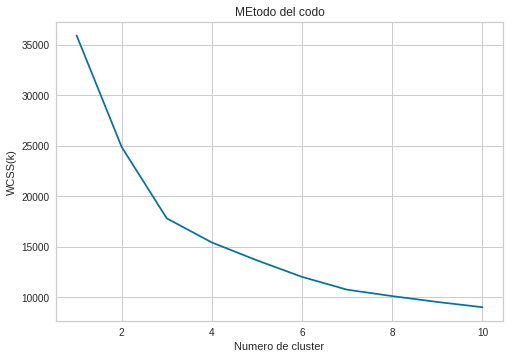

In [44]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Por_dataset_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("MEtodo del codo")
plt.xlabel("Numero de cluster")
plt.ylabel("WCSS(k)")
plt.show()

In [45]:
Por_dataset_pca

array([[ 5.90473943, -2.88410442, -1.48035292,  0.6255431 ,  1.34606036,
         7.81154614],
       [ 1.0423416 , -2.68144956, -2.89629491, -0.50859096, -0.61045311,
         0.81796067],
       [ 0.25337449,  2.44231794, -1.91453936, -0.83471924, -0.22645085,
        -2.29789371],
       ...,
       [ 2.80039719,  0.87192457, -2.28349743,  1.12514403, -2.54190048,
        -0.46987317],
       [ 3.92335915,  0.60439971,  1.25231189, -1.82363695,  2.1024911 ,
        -0.20077117],
       [ 1.8365136 , -0.58629404,  1.36322009, -0.84318079, -1.39755509,
         1.35681886]])

In [46]:
kmeans = KMeans(n_clusters = 3, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(Por_dataset_pca)
y_kmeans

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1,
       2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0,
       0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2,
       2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0,
       1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2,
       0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0,

In [47]:
centroids_por_pca = kmeans.cluster_centers_
centroids_por_pca = centroids_por_pca.round()
centroids_por_pca_df = pd.DataFrame(centroids_por_pca)
centroids_por_pca_df

,0,1,2,3,4,5
0,-4.0,1.0,0.0,0.0,0.0,-0.0
1,3.0,-3.0,-0.0,-0.0,-0.0,0.0
2,6.0,6.0,0.0,-0.0,-0.0,0.0


## Juntos

In [48]:
frames = [Por_dataset, Mat_dataset]
dt_def = pd.concat(frames)

In [49]:
dt_def

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [50]:
dt_def_pp = dt_def.iloc[:,:].values
dt_def_pp

array([['GP', 'F', 18, ..., 0, 11, 11],
       ['GP', 'F', 17, ..., 9, 11, 11],
       ['GP', 'F', 15, ..., 12, 13, 12],
       ...,
       ['MS', 'M', 21, ..., 10, 8, 7],
       ['MS', 'M', 18, ..., 11, 12, 10],
       ['MS', 'M', 19, ..., 8, 9, 9]], dtype=object)

In [51]:
column= [0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22]
for i in column:
  le_X = preprocessing.LabelEncoder()
  dt_def_pp[:,i] = le_X.fit_transform(dt_def_pp[:,i])

braycurtis


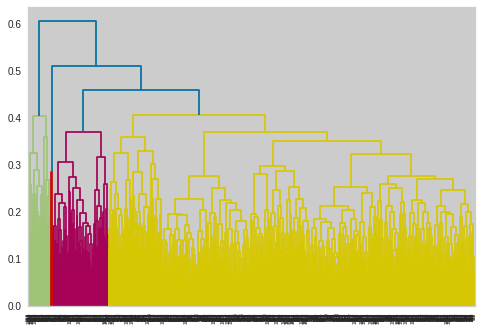

canberra


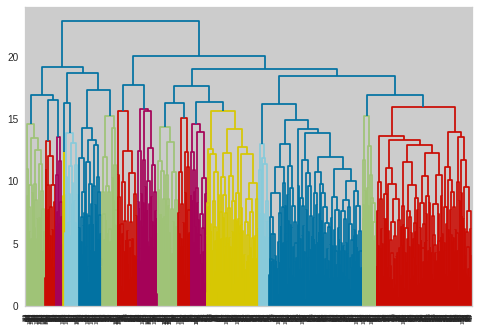

chebyshev


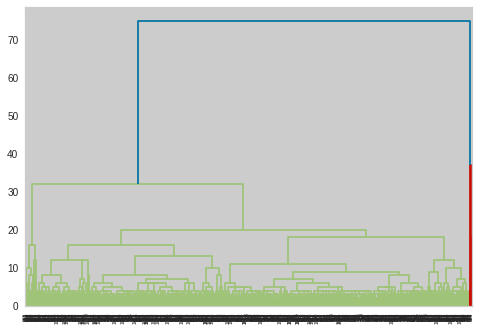

cityblock


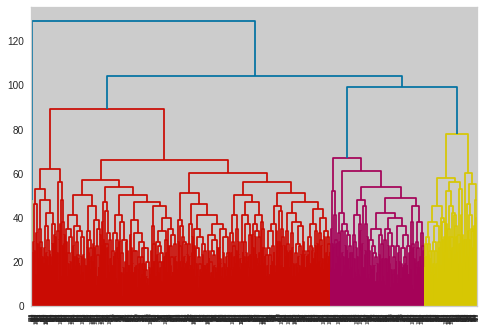

correlation


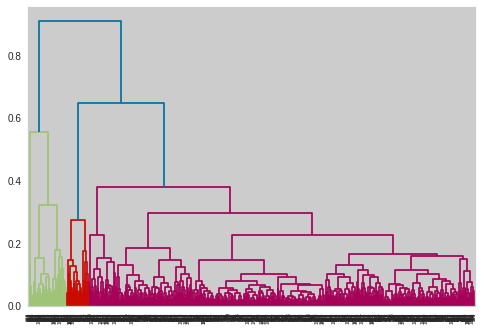

cosine


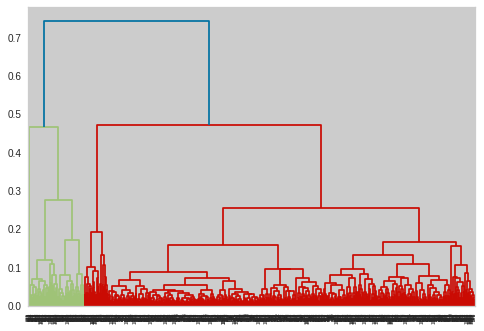

dice


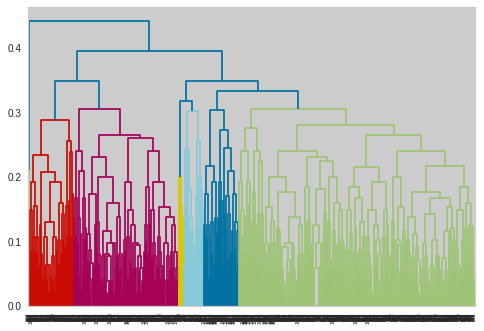

euclidean


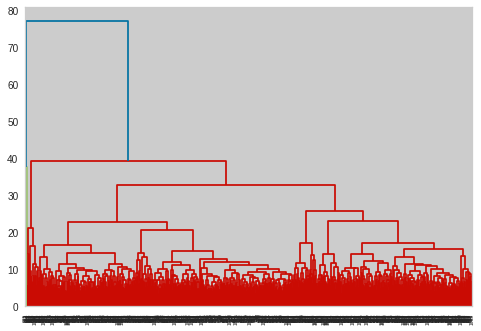

hamming


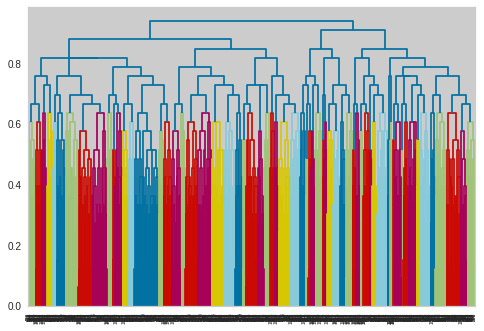

jaccard


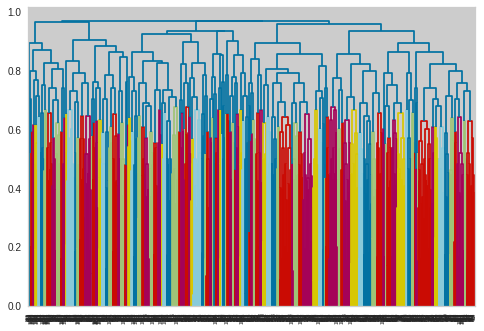

jensenshannon


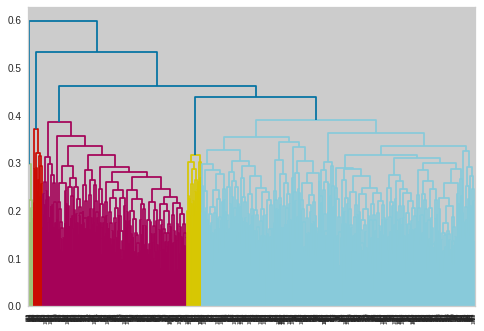

kulsinski


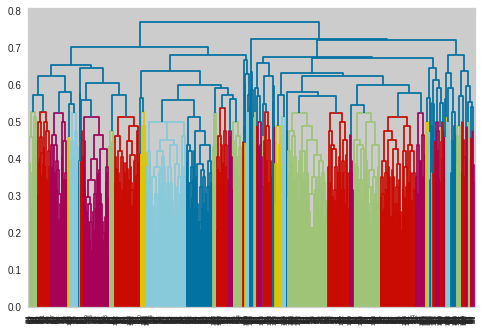

mahalanobis


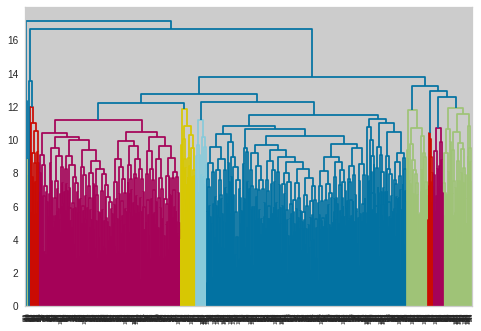

matching


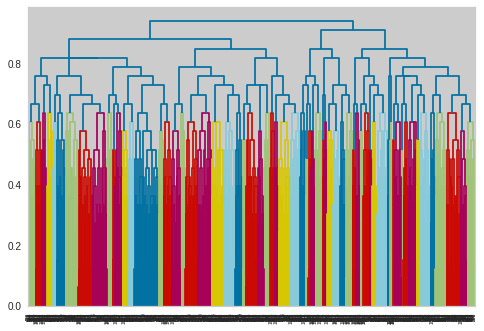

minkowski


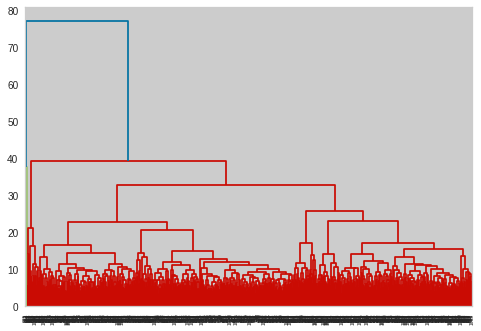

rogerstanimoto


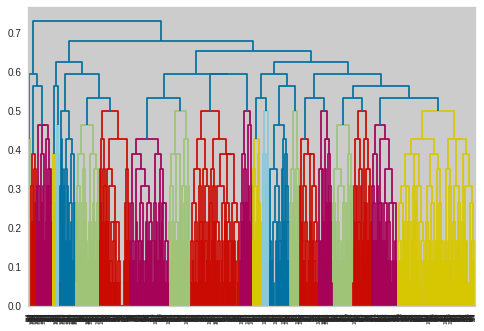

russellrao


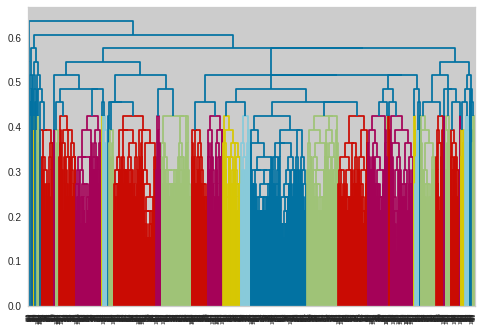

seuclidean


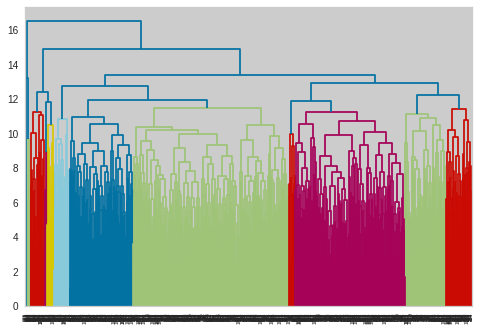

sokalmichener


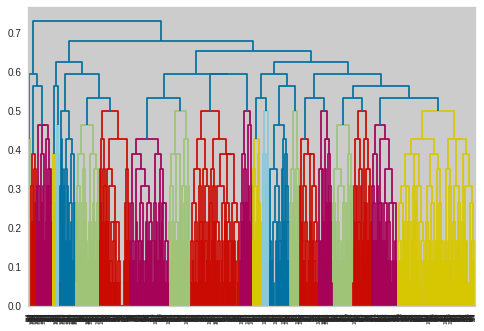

sokalsneath


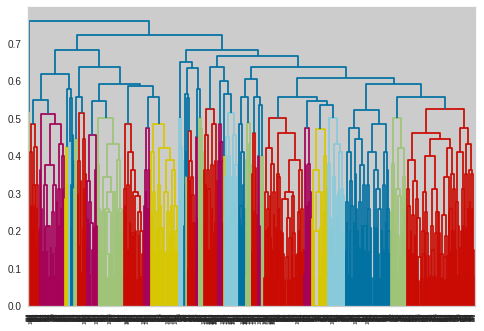

sqeuclidean


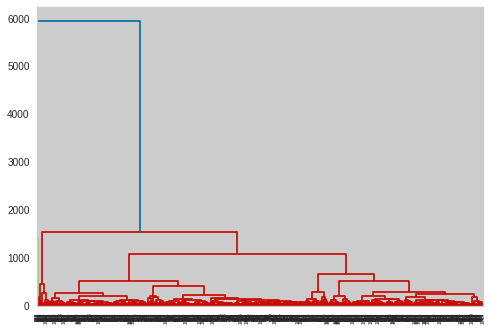

yule


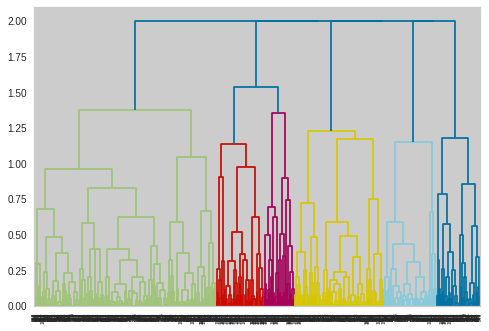

In [52]:
metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']
for i in metrics:
    print(i)
    defi = sch.linkage(dt_def_pp, method='complete', metric=i)
    sch.dendrogram(defi)
    plt.show()

## Metodo del codo

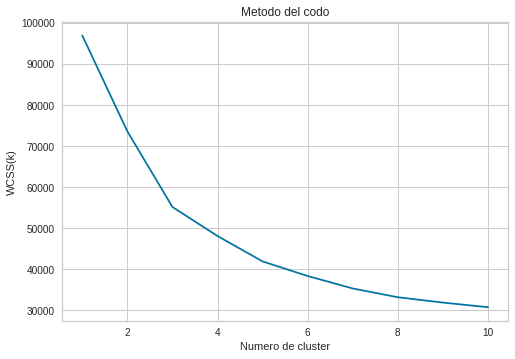

In [53]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dt_def_pp)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Metodo del codo")
plt.xlabel("Numero de cluster")
plt.ylabel("WCSS(k)")
plt.show()

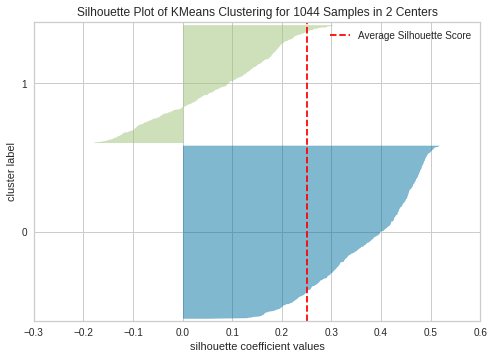

In [54]:
model = SilhouetteVisualizer(KMeans(2, random_state=42), colors='yellowbrick')
model.fit(dt_def_pp)        
model.show()

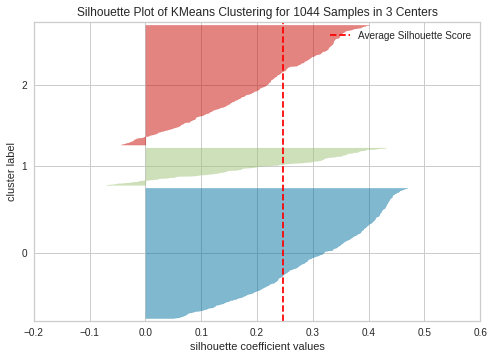

In [55]:
model = SilhouetteVisualizer(KMeans(3, random_state=42), colors='yellowbrick')
model.fit(dt_def_pp)        
model.show()

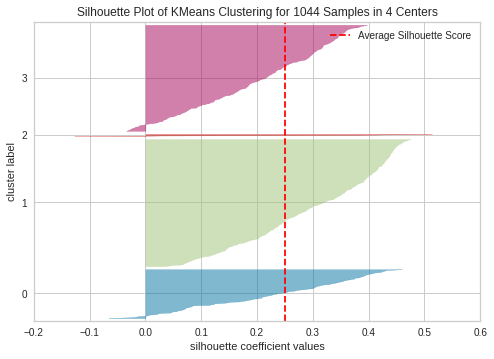

In [56]:
model = SilhouetteVisualizer(KMeans(4, random_state=42), colors='yellowbrick')
model.fit(dt_def_pp)        
model.show()

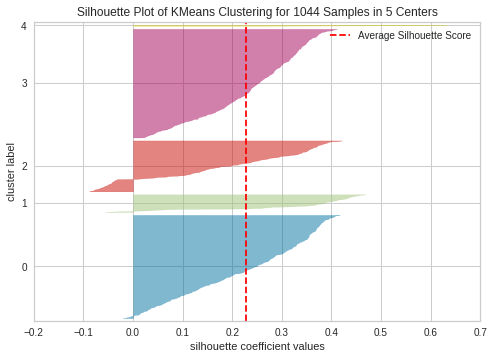

In [57]:
model = SilhouetteVisualizer(KMeans(5, random_state=42), colors='yellowbrick')
model.fit(dt_def_pp)        
model.show()

In [58]:
kmeans_def = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
Def_y_kmeans = kmeans_def.fit_predict(dt_def_pp)
Def_y_kmeans

array([1, 1, 2, ..., 1, 1, 1], dtype=int32)

In [59]:
centroids_def  = kmeans.cluster_centers_
centroids_def = centroids_math.round()
CentroidsdefDF = pd.DataFrame(centroids_def)
CentroidsdefDF

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,1.0,16.0,1.0,0.0,1.0,3.0,3.0,2.0,2.0,...,4.0,3.0,3.0,1.0,2.0,4.0,3.0,14.0,14.0,14.0
1,0.0,0.0,17.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,...,4.0,3.0,3.0,1.0,2.0,4.0,2.0,8.0,7.0,6.0
2,-0.0,0.0,18.0,1.0,0.0,1.0,3.0,3.0,2.0,3.0,...,4.0,2.0,3.0,1.0,2.0,4.0,53.0,10.0,10.0,9.0
3,0.0,0.0,17.0,1.0,0.0,1.0,3.0,3.0,2.0,2.0,...,4.0,3.0,3.0,2.0,3.0,3.0,15.0,10.0,10.0,10.0


# Cuales son los repetidos? 👀

# Hacer SVD para visualizar Datos y vovler a hacer PCA